In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"
              ,parse_dates = ["Date"],
              index_col=["Date"])

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Date', ylabel='Closing Price (USD)'>

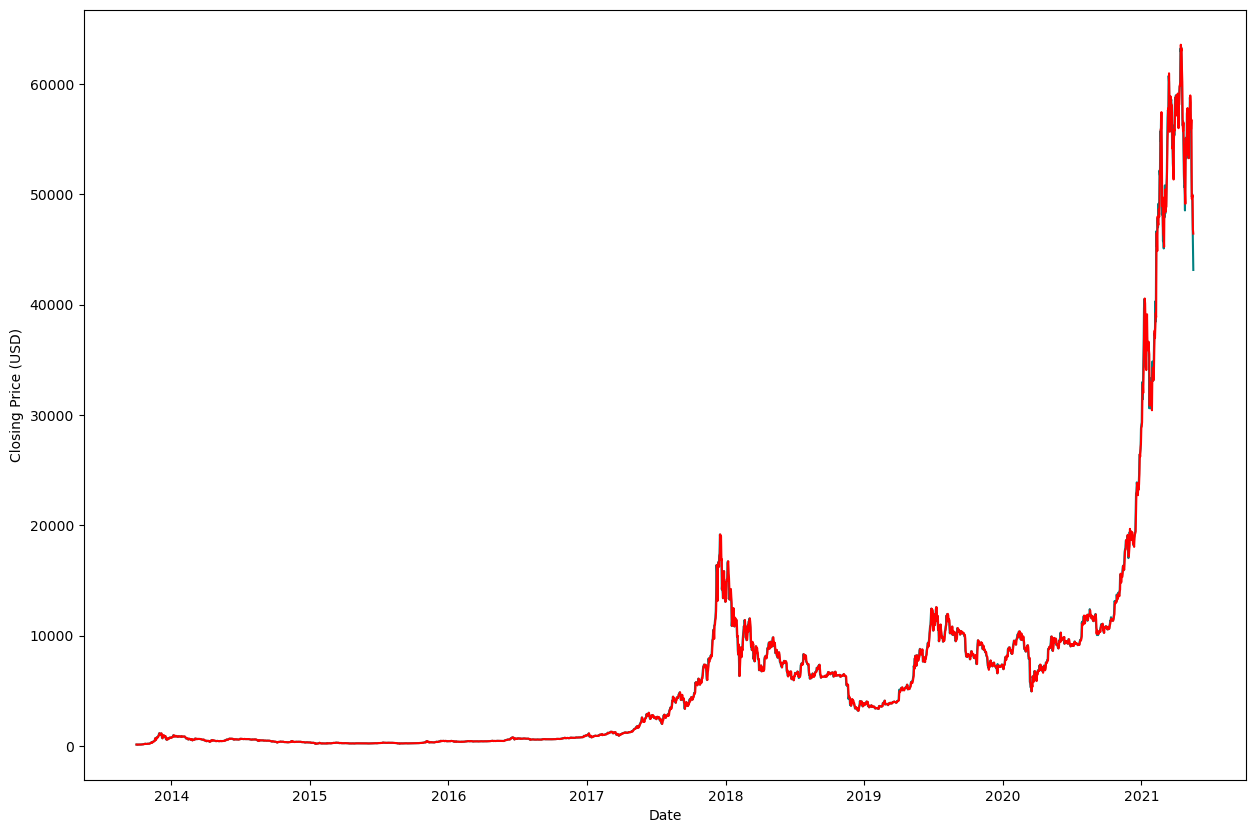

In [7]:
plt.figure(figsize=(15,10))
sns.lineplot(df["Closing Price (USD)"],color="teal")
sns.lineplot(df["24h Open (USD)"],color="red")

<Axes: xlabel='Date', ylabel='24h High (USD)'>

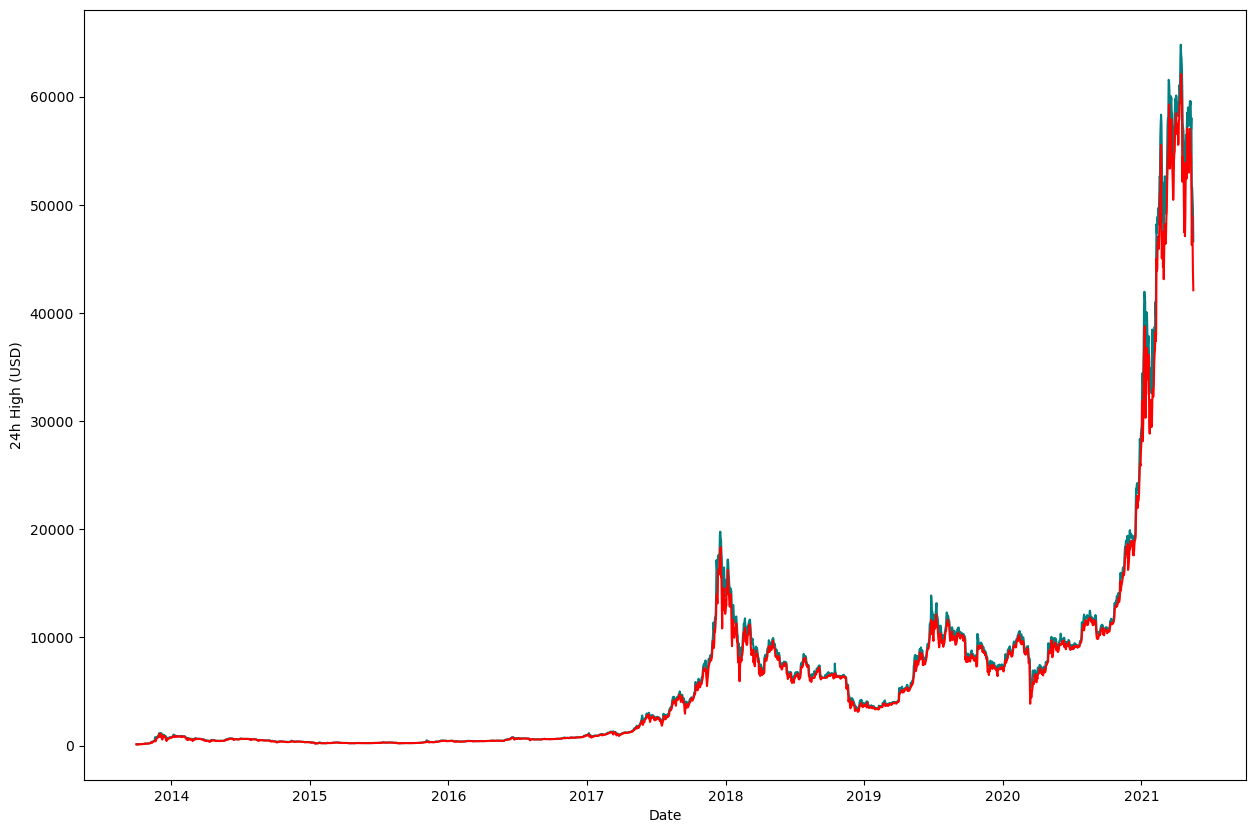

In [8]:
plt.figure(figsize=(15,10))
sns.lineplot(df["24h High (USD)"],color="teal")
sns.lineplot(df["24h Low (USD)"],color="red")

In [9]:
bitcoin = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


<Axes: xlabel='Date'>

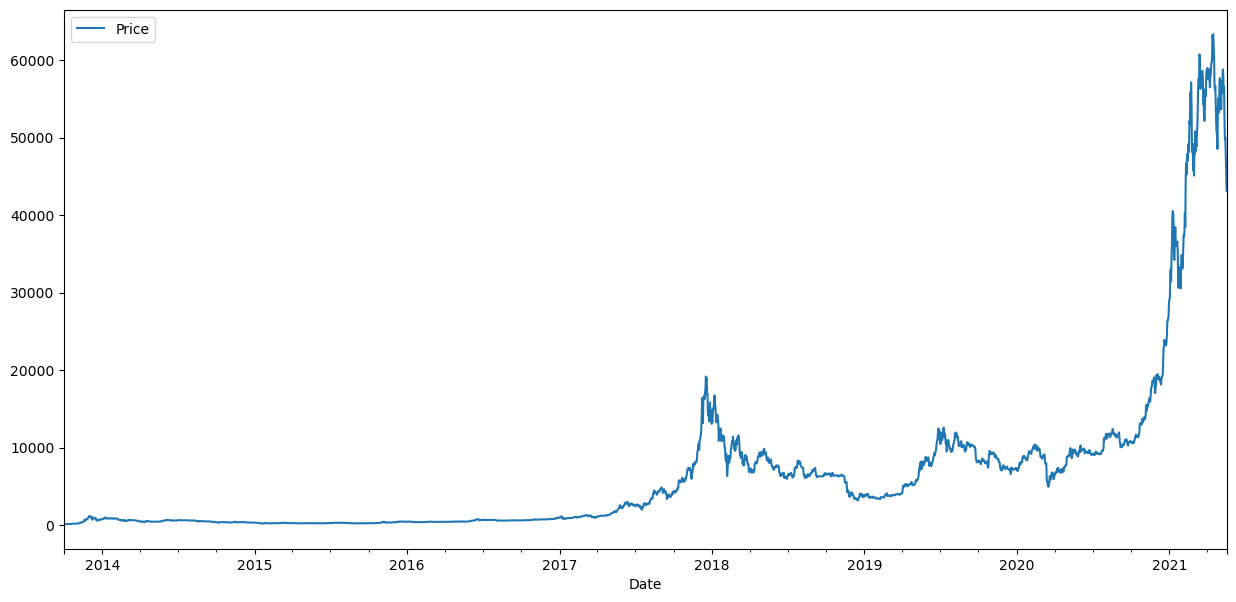

In [10]:
bitcoin.plot(figsize=(15,7))

In [343]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC-USD(3).csv","r") as f:
    csv_reader = csv.reader(f,delimiter=",")
    next(csv_reader) #skips column title
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
        btc_price.append(float(line[4]))

OSError: [Errno 22] Invalid argument: 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'

In [12]:
timesteps[:10]

[datetime.datetime(2014, 9, 17, 0, 0),
 datetime.datetime(2014, 9, 18, 0, 0),
 datetime.datetime(2014, 9, 19, 0, 0),
 datetime.datetime(2014, 9, 20, 0, 0),
 datetime.datetime(2014, 9, 21, 0, 0),
 datetime.datetime(2014, 9, 22, 0, 0),
 datetime.datetime(2014, 9, 23, 0, 0),
 datetime.datetime(2014, 9, 24, 0, 0),
 datetime.datetime(2014, 9, 25, 0, 0),
 datetime.datetime(2014, 9, 26, 0, 0)]

In [13]:
btc_price[:10]

[457.334015,
 424.440002,
 394.79599,
 408.903992,
 398.821014,
 402.152008,
 435.790985,
 423.204987,
 411.574005,
 404.424988]

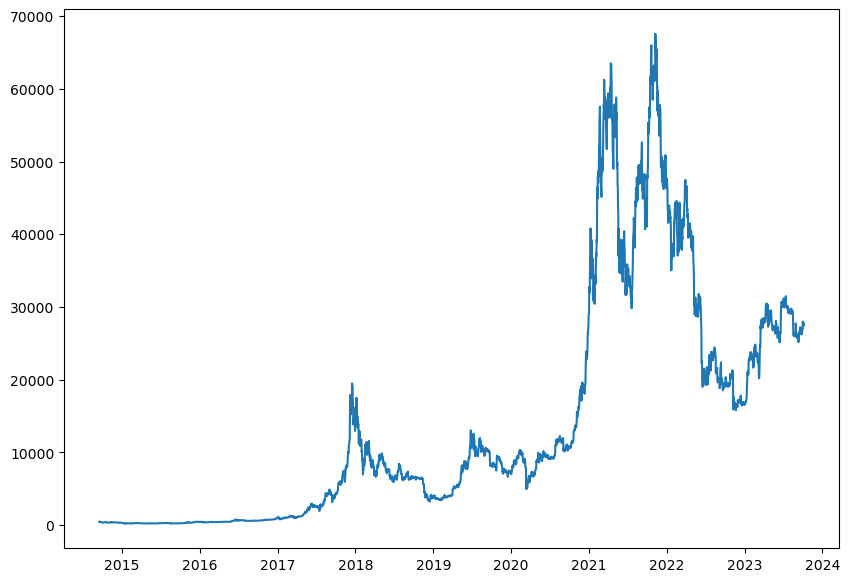

In [14]:
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)

## Train and test splits

In [15]:
timesteps = bitcoin.index.to_numpy()
prices = bitcoin["Price"].to_numpy()

split_size = int(0.8*len(prices))
X_train, y_train = timesteps[:split_size],prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

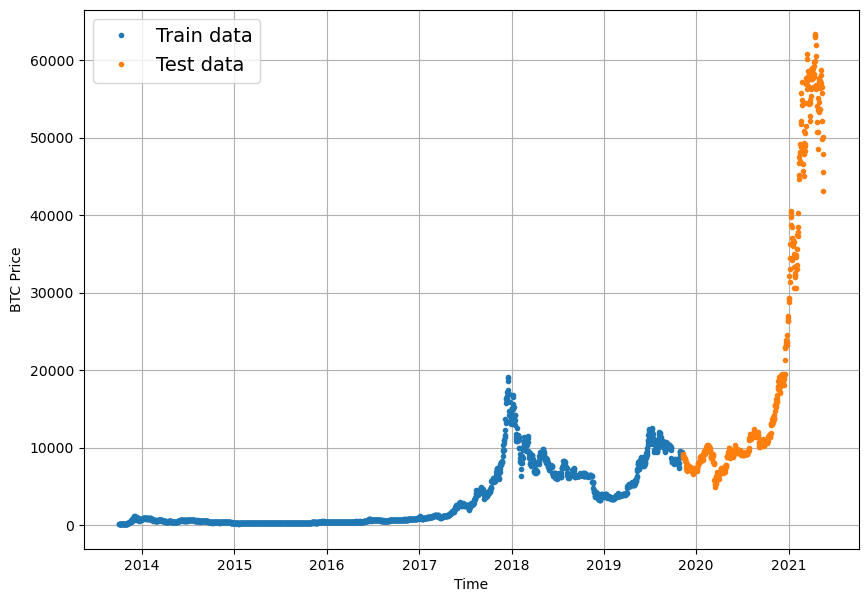

In [16]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
     

## MODEL 0 
**NAIVE MODEL**
[BASELINE]
* window = 1 
* horizon = 1

In [17]:
#CREATE A NAIVE FORECAST
naive_forecast = y_test[:-1]

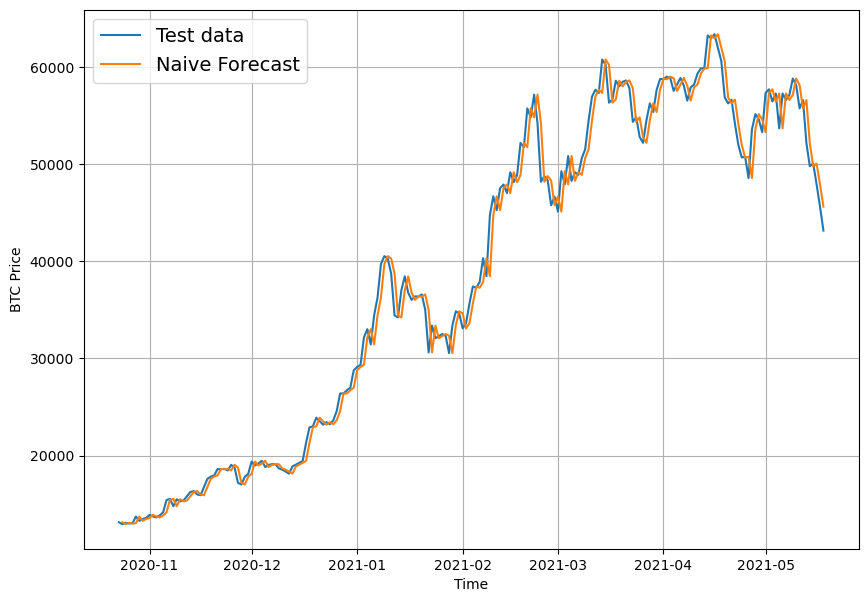

In [18]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

In [19]:
import tensorflow as tf
     

# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season
     
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [20]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [22]:
# WINDOWING OUR DATASET

HORIZON = 1
WINDOW_SIZE = 7

In [23]:
def get_labelled_window(x, horizon=HORIZON):
    return x[:,:-horizon],x[:,-horizon:]

In [24]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis=0))
print(f"Window : {tf.squeeze(test_window)} -> label : {tf.squeeze(test_label)}")

Window : [1 2 3 4 5 6 7] -> label : 8


In [25]:
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
    
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    #print(f"Window indexes:\n{window_indexes, window_indexes.shape}")
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_window(windowed_array)
    return windows, labels

In [26]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [27]:
len(prices)

2787

In [28]:
for i in range(3):
    print(f"Window: {full_windows[i-1]} -> label: {full_labels[i-1]}")

Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> label: [43144.47129086]
Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label: [124.049]


In [29]:
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows)*(1-test_split))
    train_window = windows[:split_size]
    train_label = labels[:split_size]
    test_window = windows[split_size:]
    test_label = labels[split_size:]
    return train_window, test_window, train_label, test_label

In [30]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [31]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, 
                                            save_best_only=True)

## MODEL 1
**DENSE MODEL**
* WINDOW = 7
* HORIZON = 1

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

In [136]:
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])

model_1.fit(x=train_windows,y=train_labels,epochs=100,verbose=0,batch_size=128,validation_data=(test_windows,test_labels)
           ,callbacks=[create_model_checkpoint(model_name=model_1.name)])

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


In [34]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 619.1465 - mae: 619.1465 - mse: 1255547.6250


[619.146484375, 619.146484375, 1255547.625]

In [35]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 999us/step - loss: 565.6077 - mae: 565.6077 - mse: 1157612.8750


[565.607666015625, 565.607666015625, 1157612.875]

In [36]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [37]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [38]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8848.112 , 8774.68  , 9046.015 , 8775.107 , 8740.941 , 8741.66  ,
        8684.8125, 8497.495 , 8470.014 , 8525.492 ], dtype=float32)>)

In [39]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)

In [40]:
model_1_results

{'mae': 565.6077,
 'mse': 1157613.4,
 'rmse': 1075.9244,
 'mape': 2.5281384,
 'mase': 0.9936161}

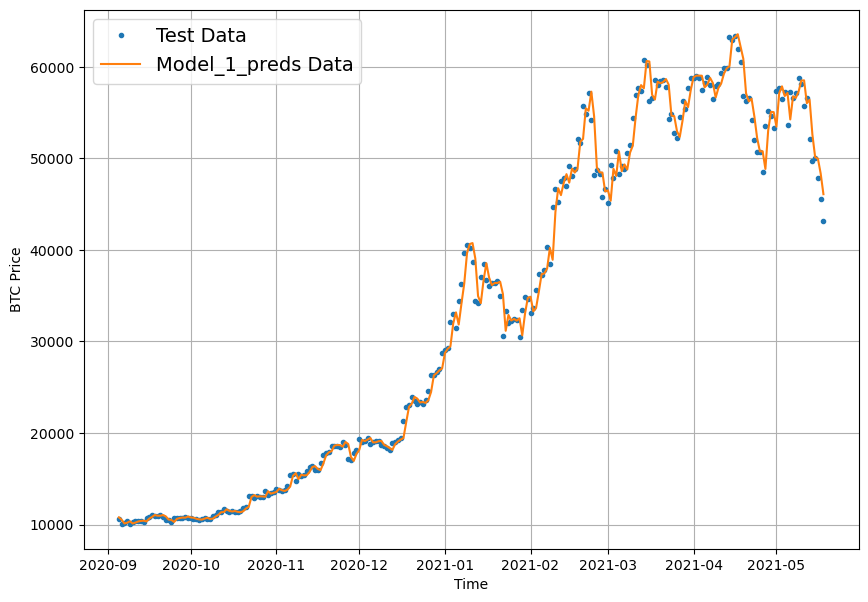

In [41]:
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,start=offset,format="-",label="Model_1_preds Data")

## Model 2
### **Dense** 
* window = 30 
* horizon = 1

In [42]:
WINDOW_SIZE=30
HORIZON=1
full_windows_2, full_labels_2 = make_windows(prices,window_size=30)
len(full_windows_2), len(full_labels_2)

(2757, 2757)

In [43]:
train_windows_2, test_windows_2, train_labels_2, test_labels_2 = make_train_test_splits(full_windows_2,full_labels_2)
len(train_windows_2), len(test_windows_2), len(train_labels_2), len(test_labels_2)

(2205, 552, 2205, 552)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

In [45]:
model_2 = tf.keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])

model_2.fit(x=train_windows_2,y=train_labels_2,epochs=300,verbose=0,batch_size=256,validation_data=(test_windows_2,test_labels_2)
           ,callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


In [46]:
model_2_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_1_dense")

model_2_1.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])

model_2_1.fit(x=train_windows_2,y=train_labels_2,epochs=300,verbose=0,batch_size=256,validation_data=(test_windows_2,test_labels_2)
           ,callbacks=[create_model_checkpoint(model_name=model_2_1.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_1_dense\assets


In [47]:
model_2_1.evaluate(test_windows_2, test_labels_2)

18/18 [==============================] - 0s 1ms/step - loss: 687.9108 - mae: 687.9108 - mse: 1444700.1250


[687.9108276367188, 687.9108276367188, 1444700.125]

In [48]:
model_2_1 = tf.keras.models.load_model("model_experiments/model_2_1_dense/")
model_2_1.evaluate(test_windows_2,test_labels_2)

18/18 [==============================] - 0s 999us/step - loss: 585.4520 - mae: 585.4520 - mse: 1208347.3750


[585.4519653320312, 585.4519653320312, 1208347.375]

In [49]:
model_2_1_preds = make_preds(model_2_1,test_windows_2)
#len(model_2_preds),model_2_preds[:10]
model_2_1_results = evaluate_preds(y_true=tf.squeeze(test_labels_2),y_pred=model_2_1_preds)
model_2_1_results

18/18 [==============================] - 0s 940us/step


{'mae': 585.4519,
 'mse': 1208347.4,
 'rmse': 1099.2485,
 'mape': 2.634535,
 'mase': 1.0233756}

In [50]:
model_2.evaluate(test_windows_2, test_labels_2)

18/18 [==============================] - 0s 1ms/step - loss: 865.6278 - mae: 865.6278 - mse: 2012490.6250


[865.6278076171875, 865.6278076171875, 2012490.625]

In [51]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows_2,test_labels_2)

18/18 [==============================] - 0s 1ms/step - loss: 581.0069 - mae: 581.0069 - mse: 1195663.5000


[581.0068969726562, 581.0068969726562, 1195663.5]

In [52]:
model_2_preds = make_preds(model_2,test_windows_2)
#len(model_2_preds),model_2_preds[:10]
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_2),y_pred=model_2_preds)

18/18 [==============================] - 0s 840us/step


In [53]:
model_2_results, model_1_results

({'mae': 581.0069,
  'mse': 1195664.0,
  'rmse': 1093.4642,
  'mape': 2.6513052,
  'mase': 1.0156058},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

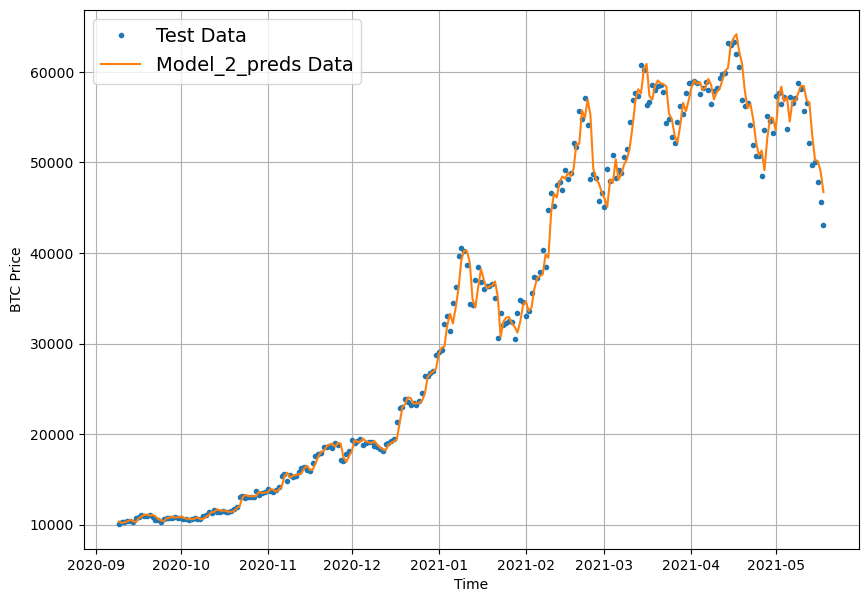

In [54]:
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows_2):],values=test_labels_2[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows_2):],values=model_2_preds,start=offset,format="-",label="Model_2_preds Data")

## Model 3
### **Dense** 
* window = 30 
* horizon = 7

In [55]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, 30, 7)

In [56]:
len(full_windows),len(full_labels)

(2751, 2751)

In [57]:
train_windows, test_windows, train_labels,test_labels = make_train_test_splits(windows=full_windows,labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [58]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(256,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_dense")

model_3.compile(loss="MAE",
               optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,train_labels,batch_size=256,epochs=100,
           verbose=0,validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


In [59]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 997us/step - loss: 685.0143


685.0142822265625

In [60]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 997us/step - loss: 651.2576


651.2576293945312

In [61]:
'''model_3_preds = make_preds(model_3,test_windows)
#len(model_2_preds),model_2_preds[:10]
model_3_results = evaluate_preds(y_true=test_labels,y_pred=model_3_preds)
model_3_results,model_2_results,model_1_results'''

'model_3_preds = make_preds(model_3,test_windows)\n#len(model_2_preds),model_2_preds[:10]\nmodel_3_results = evaluate_preds(y_true=test_labels,y_pred=model_3_preds)\nmodel_3_results,model_2_results,model_1_results'

In [62]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [63]:
model_3_preds = make_preds(model_3,test_windows)
#len(model_2_preds),model_2_preds[:10]
model_3_results = evaluate_preds(y_true=test_labels,y_pred=model_3_preds)
model_3_results,model_2_results,model_1_results

18/18 [==============================] - 0s 821us/step


({'mae': 651.2576,
  'mse': 1465416.5,
  'rmse': 678.4442,
  'mape': 2.9671333,
  'mase': 1.1366724},
 {'mae': 581.0069,
  'mse': 1195664.0,
  'rmse': 1093.4642,
  'mape': 2.6513052,
  'mase': 1.0156058},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

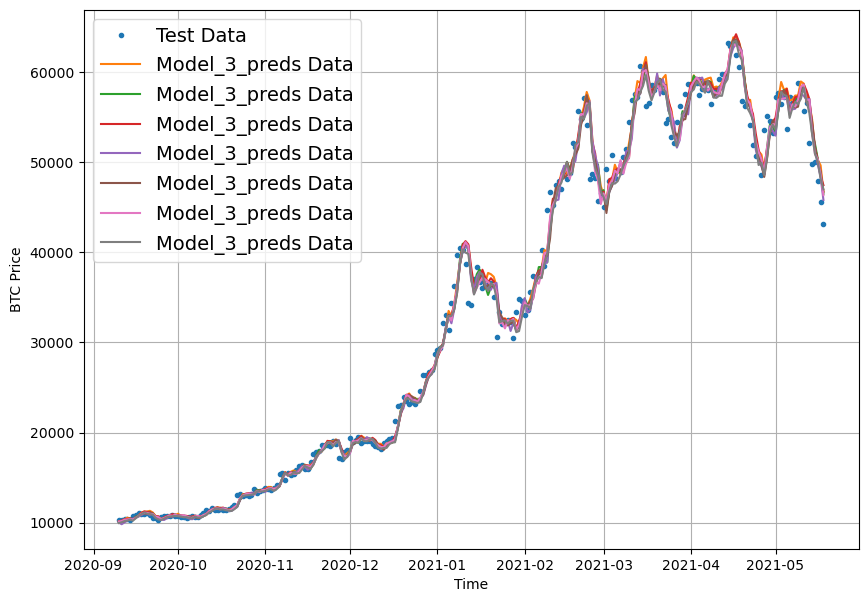

In [64]:
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds,start=offset,format="-",label="Model_3_preds Data")

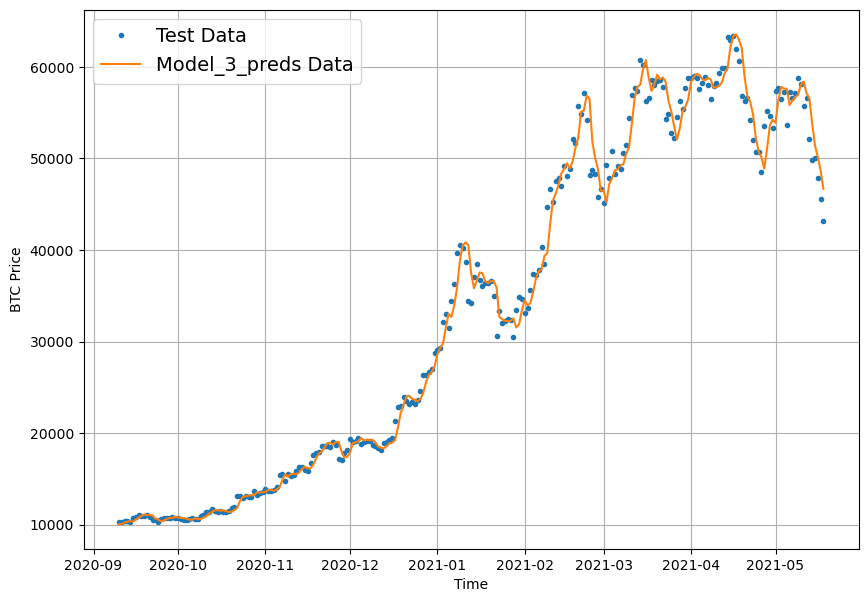

In [65]:
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),start=offset,format="-",label="Model_3_preds Data")

<Axes: >

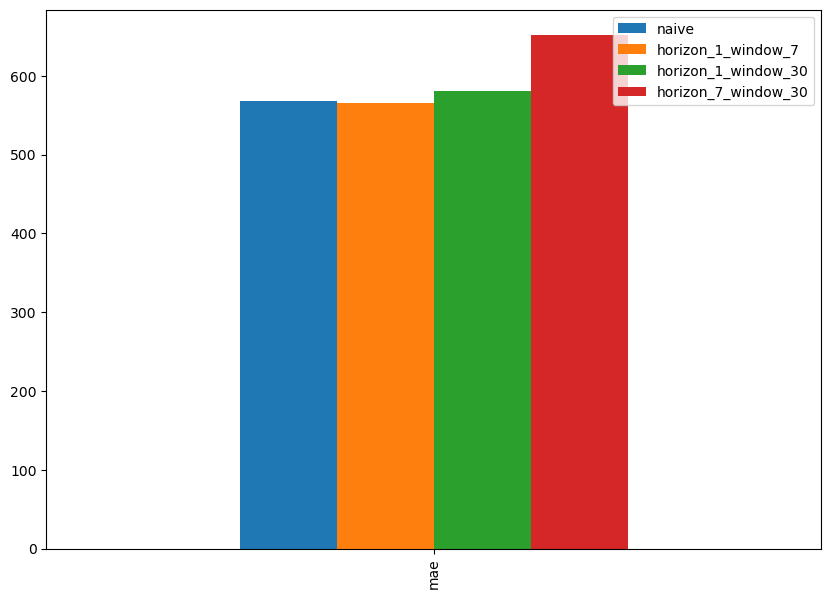

In [66]:

pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

## Model 4
### **CONV 1D** 
* window = 7 
* horizon = 1

In [67]:
HORIZON=1
WINDOW_SIZE=7

In [68]:
full_windows_4, full_labels_4 = make_windows(prices,WINDOW_SIZE,HORIZON)
len(full_windows_4),len(full_labels_4)

(2780, 2780)

In [69]:
train_windows_4,test_windows_4, train_labels_4, test_labels_4 = make_train_test_splits(full_windows_4,full_labels_4)

In [70]:
len(train_windows_4),len(test_windows_4), len(train_labels_4), len(test_labels_4)

(2224, 556, 2224, 556)

In [71]:
train_windows_4[0].shape

(7,)

In [72]:
x = tf.constant(train_windows_4[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [73]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [74]:
print(f"OG : {x.shape}")
print(f"expanded shape : {expand_dims_layer(x).shape}")
print(f"expanded : {expand_dims_layer(x)}")

OG : (7,)
expanded shape : (7, 1)
expanded : [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [83]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding = "causal",activation="relu"),
    layers.Dense(HORIZON)
],name="model_4_Conv1D")

model_4.compile(loss="mae",optimizer=tf.keras.optimizers.Adam()
               )

model_4.fit(train_windows_4,train_labels_4, batch_size=256, epochs=200,
           verbose=0,validation_data=(test_windows_4,test_labels_4),
           callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


In [76]:
model_4.evaluate(test_windows_4,test_labels_4)

18/18 [==============================] - 0s 934us/step - loss: 575.1247


575.1246948242188

In [77]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows_4,test_labels_4)

18/18 [==============================] - 0s 875us/step - loss: 564.6371


564.6371459960938

In [78]:
model_4_preds = make_preds(model_4,test_windows_4)
#len(model_2_preds),model_2_preds[:10]
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels_4),y_pred=model_4_preds)
model_4_results,model_2_results,model_1_results

18/18 [==============================] - 0s 875us/step


({'mae': 564.63715,
  'mse': 1163080.4,
  'rmse': 1078.462,
  'mape': 2.522921,
  'mase': 0.99191105},
 {'mae': 581.0069,
  'mse': 1195664.0,
  'rmse': 1093.4642,
  'mape': 2.6513052,
  'mase': 1.0156058},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

In [84]:
tf.random.set_seed(42)

model_4_1 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=2, padding = "causal",activation="relu"),
    layers.Dense(HORIZON)
],name="model_4_1_Conv1D")

model_4_1.compile(loss="mae",optimizer=tf.keras.optimizers.Adam()
               )

model_4_1.fit(train_windows_4,train_labels_4, batch_size=256, epochs=200,
           verbose=0,validation_data=(test_windows_4,test_labels_4),
           callbacks=[create_model_checkpoint(model_name=model_4_1.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_1_Conv1D\assets


In [85]:
model_4_1.evaluate(test_windows_4,test_labels_4)

18/18 [==============================] - 0s 1ms/step - loss: 578.6093


578.6092529296875

In [86]:
model_4_1 = tf.keras.models.load_model("model_experiments/model_4_1_Conv1D/")
model_4_1.evaluate(test_windows_4,test_labels_4)

18/18 [==============================] - 0s 1ms/step - loss: 564.8647


564.8646850585938

In [87]:
model_4_1_preds = make_preds(model_4_1,test_windows_4)
#len(model_2_preds),model_2_preds[:10]
model_4_1_results = evaluate_preds(y_true=tf.squeeze(test_labels_4),y_pred=model_4_1_preds)
model_4_1_results,model_4_results,model_2_results,model_1_results

18/18 [==============================] - 0s 1ms/step


({'mae': 564.86475,
  'mse': 1162884.2,
  'rmse': 1078.3711,
  'mape': 2.5264788,
  'mase': 0.9923109},
 {'mae': 564.63715,
  'mse': 1163080.4,
  'rmse': 1078.462,
  'mape': 2.522921,
  'mase': 0.99191105},
 {'mae': 581.0069,
  'mse': 1195664.0,
  'rmse': 1093.4642,
  'mape': 2.6513052,
  'mase': 1.0156058},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

## Model 5
### **LSTM** 
* window = 7 
* horizon = 1 

In [95]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128)(x)
#x = layers.Dense(48, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = outputs, name = "model_5_LSTM")

model_5.compile(loss="mae",optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows_4, train_labels_4, epochs=200, verbose=1, batch_size=256,validation_data=(test_windows_4,test_labels_4),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/200
1/9 [==>...........................] - ETA: 25s - loss: 3358.0845INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 881ms/step - loss: 3158.0361 - val_loss: 20095.0801
Epoch 2/200
1/9 [==>...........................] - ETA: 0s - loss: 2714.2568INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 787ms/step - loss: 3156.6294 - val_loss: 20094.0254
Epoch 3/200
1/9 [==>...........................] - ETA: 0s - loss: 3359.4609INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 813ms/step - loss: 3155.7288 - val_loss: 20093.3867
Epoch 4/200
1/9 [==>...........................] - ETA: 0s - loss: 3692.5464INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 803ms/step - loss: 3155.2722 - val_loss: 20093.0352
Epoch 5/200
1/9 [==>...........................] - ETA: 0s - loss: 3690.7998INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 797ms/step - loss: 3154.7742 - val_loss: 20092.4492
Epoch 6/200
1/9 [==>...........................] - ETA: 0s - loss: 3024.4089INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 712ms/step - loss: 3154.3105 - val_loss: 20092.0625
Epoch 7/200
1/9 [==>...........................] - ETA: 0s - loss: 3337.6289INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 877ms/step - loss: 3153.9316 - val_loss: 20091.6387
Epoch 8/200
1/9 [==>...........................] - ETA: 0s - loss: 3148.0173INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 805ms/step - loss: 3153.3950 - val_loss: 20091.0547
Epoch 9/200
1/9 [==>...........................] - ETA: 0s - loss: 2988.1411INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 709ms/step - loss: 3152.9165 - val_loss: 20090.6836
Epoch 10/200
1/9 [==>...........................] - ETA: 0s - loss: 2958.7197INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 881ms/step - loss: 3152.5461 - val_loss: 20090.3145
Epoch 11/200
1/9 [==>...........................] - ETA: 0s - loss: 3389.9080INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 809ms/step - loss: 3152.1799 - val_loss: 20089.9512
Epoch 12/200
1/9 [==>...........................] - ETA: 0s - loss: 3451.7854INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 789ms/step - loss: 3151.8179 - val_loss: 20089.5918
Epoch 13/200
1/9 [==>...........................] - ETA: 0s - loss: 3020.1187INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 837ms/step - loss: 3151.3953 - val_loss: 20089.1055
Epoch 14/200
1/9 [==>...........................] - ETA: 0s - loss: 2986.0310INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 730ms/step - loss: 3150.9678 - val_loss: 20088.7344
Epoch 15/200
1/9 [==>...........................] - ETA: 0s - loss: 3321.2100INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 895ms/step - loss: 3150.6001 - val_loss: 20088.3691
Epoch 16/200
1/9 [==>...........................] - ETA: 0s - loss: 3433.6106INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 760ms/step - loss: 3150.2346 - val_loss: 20088.0059
Epoch 17/200
1/9 [==>...........................] - ETA: 0s - loss: 3020.9885INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 627ms/step - loss: 3149.8726 - val_loss: 20087.6445
Epoch 18/200
1/9 [==>...........................] - ETA: 0s - loss: 3121.7070INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 796ms/step - loss: 3149.5127 - val_loss: 20087.2832
Epoch 19/200
1/9 [==>...........................] - ETA: 0s - loss: 2641.0359INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 836ms/step - loss: 3149.1545 - val_loss: 20086.9297
Epoch 20/200
1/9 [==>...........................] - ETA: 0s - loss: 3209.3081INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 825ms/step - loss: 3148.7979 - val_loss: 20086.5742
Epoch 21/200
1/9 [==>...........................] - ETA: 0s - loss: 3406.4956INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 824ms/step - loss: 3148.4431 - val_loss: 20086.2188
Epoch 22/200
1/9 [==>...........................] - ETA: 0s - loss: 3342.7732INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 807ms/step - loss: 3148.0896 - val_loss: 20085.8652
Epoch 23/200
1/9 [==>...........................] - ETA: 0s - loss: 2942.3809INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 746ms/step - loss: 3147.7368 - val_loss: 20085.5137
Epoch 24/200
1/9 [==>...........................] - ETA: 0s - loss: 3637.5234INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 928ms/step - loss: 3147.3850 - val_loss: 20085.1641
Epoch 25/200
1/9 [==>...........................] - ETA: 0s - loss: 3221.3757INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 814ms/step - loss: 3147.0344 - val_loss: 20084.8125
Epoch 26/200
1/9 [==>...........................] - ETA: 0s - loss: 3104.1309INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 762ms/step - loss: 3146.6841 - val_loss: 20084.4648
Epoch 27/200
9/9 [==============================] - ETA: 0s - loss: 3146.3345INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 934ms/step - loss: 3146.3345 - val_loss: 20084.1133
Epoch 28/200
1/9 [==>...........................] - ETA: 0s - loss: 3335.4155INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 832ms/step - loss: 3145.9856 - val_loss: 20083.7656
Epoch 29/200
1/9 [==>...........................] - ETA: 0s - loss: 3072.3130INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 809ms/step - loss: 3145.6372 - val_loss: 20083.4180
Epoch 30/200
1/9 [==>...........................] - ETA: 0s - loss: 3211.5225INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 831ms/step - loss: 3145.2686 - val_loss: 20082.9453
Epoch 31/200
1/9 [==>...........................] - ETA: 0s - loss: 3298.3862INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 702ms/step - loss: 3144.8108 - val_loss: 20082.5801
Epoch 32/200
1/9 [==>...........................] - ETA: 0s - loss: 3096.6802INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 875ms/step - loss: 3144.4412 - val_loss: 20082.2090
Epoch 33/200
1/9 [==>...........................] - ETA: 0s - loss: 3139.2910INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 836ms/step - loss: 3144.0667 - val_loss: 20081.7617
Epoch 34/200
1/9 [==>...........................] - ETA: 0s - loss: 2798.6157INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 700ms/step - loss: 3143.6160 - val_loss: 20081.3750
Epoch 35/200
1/9 [==>...........................] - ETA: 0s - loss: 3041.8953INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 820ms/step - loss: 3143.2288 - val_loss: 20080.9863
Epoch 36/200
1/9 [==>...........................] - ETA: 0s - loss: 3552.6226INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 839ms/step - loss: 3142.8442 - val_loss: 20080.6035
Epoch 37/200
8/9 [=========================>....] - ETA: 0s - loss: 3135.0911INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 765ms/step - loss: 3142.4626 - val_loss: 20080.2246
Epoch 38/200
1/9 [==>...........................] - ETA: 0s - loss: 3214.2192INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 768ms/step - loss: 3142.0840 - val_loss: 20079.8496
Epoch 39/200
1/9 [==>...........................] - ETA: 0s - loss: 3314.3237INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 665ms/step - loss: 3141.7078 - val_loss: 20079.4727
Epoch 40/200
1/9 [==>...........................] - ETA: 0s - loss: 3112.7866INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 825ms/step - loss: 3141.3340 - val_loss: 20079.1016
Epoch 41/200
1/9 [==>...........................] - ETA: 0s - loss: 3036.8232INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 733ms/step - loss: 3140.9614 - val_loss: 20078.7266
Epoch 42/200
1/9 [==>...........................] - ETA: 0s - loss: 3060.1670INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 641ms/step - loss: 3140.5906 - val_loss: 20078.3574
Epoch 43/200
1/9 [==>...........................] - ETA: 0s - loss: 3213.8799INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 809ms/step - loss: 3140.2034 - val_loss: 20077.9551
Epoch 44/200
1/9 [==>...........................] - ETA: 0s - loss: 2637.7383INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 714ms/step - loss: 3139.8083 - val_loss: 20077.5625
Epoch 45/200
1/9 [==>...........................] - ETA: 0s - loss: 3004.6611INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 704ms/step - loss: 3139.4150 - val_loss: 20077.1699
Epoch 46/200
1/9 [==>...........................] - ETA: 0s - loss: 2720.1992INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 729ms/step - loss: 3139.0247 - val_loss: 20076.7812
Epoch 47/200
1/9 [==>...........................] - ETA: 0s - loss: 3413.4346INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 637ms/step - loss: 3138.6372 - val_loss: 20076.3965
Epoch 48/200
1/9 [==>...........................] - ETA: 0s - loss: 2983.6621INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 833ms/step - loss: 3138.2520 - val_loss: 20076.0117
Epoch 49/200
1/9 [==>...........................] - ETA: 0s - loss: 3393.6169INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 745ms/step - loss: 3137.8691 - val_loss: 20075.6289
Epoch 50/200
1/9 [==>...........................] - ETA: 0s - loss: 3080.3091INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 630ms/step - loss: 3137.4878 - val_loss: 20075.2500
Epoch 51/200
1/9 [==>...........................] - ETA: 0s - loss: 2925.3904INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 778ms/step - loss: 3137.1084 - val_loss: 20074.8711
Epoch 52/200
1/9 [==>...........................] - ETA: 0s - loss: 2947.6743INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 715ms/step - loss: 3136.7297 - val_loss: 20074.4922
Epoch 53/200
1/9 [==>...........................] - ETA: 0s - loss: 2747.8911INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 701ms/step - loss: 3136.3523 - val_loss: 20074.1152
Epoch 54/200
1/9 [==>...........................] - ETA: 0s - loss: 3105.2568INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 717ms/step - loss: 3135.9758 - val_loss: 20073.7383
Epoch 55/200
1/9 [==>...........................] - ETA: 0s - loss: 3275.6248INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 623ms/step - loss: 3135.6003 - val_loss: 20073.3633
Epoch 56/200
1/9 [==>...........................] - ETA: 0s - loss: 3066.4678INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 772ms/step - loss: 3135.2253 - val_loss: 20072.9883
Epoch 57/200
1/9 [==>...........................] - ETA: 0s - loss: 3332.5718INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 698ms/step - loss: 3134.8508 - val_loss: 20072.6152
Epoch 58/200
1/9 [==>...........................] - ETA: 0s - loss: 3005.6536INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 721ms/step - loss: 3134.4775 - val_loss: 20072.2422
Epoch 59/200
1/9 [==>...........................] - ETA: 0s - loss: 2893.2852INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 697ms/step - loss: 3134.1047 - val_loss: 20071.8711
Epoch 60/200
1/9 [==>...........................] - ETA: 0s - loss: 3132.9004INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 720ms/step - loss: 3133.7324 - val_loss: 20071.4980
Epoch 61/200
1/9 [==>...........................] - ETA: 0s - loss: 3219.1545INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 614ms/step - loss: 3133.3611 - val_loss: 20071.1250
Epoch 62/200
1/9 [==>...........................] - ETA: 0s - loss: 2981.5273INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 767ms/step - loss: 3132.9895 - val_loss: 20070.7559
Epoch 63/200
1/9 [==>...........................] - ETA: 0s - loss: 3589.9312INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 722ms/step - loss: 3132.6184 - val_loss: 20070.3848
Epoch 64/200
1/9 [==>...........................] - ETA: 0s - loss: 3233.3130INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 712ms/step - loss: 3132.2478 - val_loss: 20070.0137
Epoch 65/200
1/9 [==>...........................] - ETA: 0s - loss: 3183.3650INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 621ms/step - loss: 3131.8777 - val_loss: 20069.6445
Epoch 66/200
1/9 [==>...........................] - ETA: 0s - loss: 3277.9863INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 782ms/step - loss: 3131.5076 - val_loss: 20069.2734
Epoch 67/200
1/9 [==>...........................] - ETA: 0s - loss: 3110.2441INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 697ms/step - loss: 3131.1382 - val_loss: 20068.9062
Epoch 68/200
1/9 [==>...........................] - ETA: 0s - loss: 3193.3833INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 701ms/step - loss: 3130.7690 - val_loss: 20068.5352
Epoch 69/200
1/9 [==>...........................] - ETA: 0s - loss: 3337.4846INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 713ms/step - loss: 3130.4001 - val_loss: 20068.1699
Epoch 70/200
1/9 [==>...........................] - ETA: 0s - loss: 3443.8394INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 709ms/step - loss: 3130.0320 - val_loss: 20067.7988
Epoch 71/200
1/9 [==>...........................] - ETA: 0s - loss: 3026.4763INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 715ms/step - loss: 3129.6636 - val_loss: 20067.4316
Epoch 72/200
1/9 [==>...........................] - ETA: 0s - loss: 3002.7068INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 751ms/step - loss: 3129.2957 - val_loss: 20067.0625
Epoch 73/200
1/9 [==>...........................] - ETA: 0s - loss: 3236.2690INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 742ms/step - loss: 3128.9275 - val_loss: 20066.6934
Epoch 74/200
1/9 [==>...........................] - ETA: 0s - loss: 3279.7402INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 663ms/step - loss: 3128.5601 - val_loss: 20066.3281
Epoch 75/200
1/9 [==>...........................] - ETA: 0s - loss: 3256.4014INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 821ms/step - loss: 3128.1929 - val_loss: 20065.9609
Epoch 76/200
1/9 [==>...........................] - ETA: 0s - loss: 3031.8313INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 741ms/step - loss: 3127.8252 - val_loss: 20065.5938
Epoch 77/200
1/9 [==>...........................] - ETA: 0s - loss: 2784.5491INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 765ms/step - loss: 3127.4590 - val_loss: 20065.2266
Epoch 78/200
1/9 [==>...........................] - ETA: 0s - loss: 3331.0366INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 766ms/step - loss: 3127.0920 - val_loss: 20064.8594
Epoch 79/200
1/9 [==>...........................] - ETA: 0s - loss: 3250.0312INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 665ms/step - loss: 3126.7253 - val_loss: 20064.4941
Epoch 80/200
1/9 [==>...........................] - ETA: 0s - loss: 3098.6218INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 848ms/step - loss: 3126.3596 - val_loss: 20064.1289
Epoch 81/200
1/9 [==>...........................] - ETA: 0s - loss: 2747.5771INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 740ms/step - loss: 3125.9932 - val_loss: 20063.7617
Epoch 82/200
1/9 [==>...........................] - ETA: 0s - loss: 3439.2131INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 770ms/step - loss: 3125.6138 - val_loss: 20063.3496
Epoch 83/200
1/9 [==>...........................] - ETA: 0s - loss: 3175.9587INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 750ms/step - loss: 3125.1997 - val_loss: 20062.9512
Epoch 84/200
1/9 [==>...........................] - ETA: 0s - loss: 3705.0811INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 761ms/step - loss: 3124.8018 - val_loss: 20062.5547
Epoch 85/200
1/9 [==>...........................] - ETA: 0s - loss: 3425.8259INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 675ms/step - loss: 3124.4055 - val_loss: 20062.1582
Epoch 86/200
1/9 [==>...........................] - ETA: 0s - loss: 3062.2485INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 826ms/step - loss: 3124.0120 - val_loss: 20061.7656
Epoch 87/200
1/9 [==>...........................] - ETA: 0s - loss: 3202.6382INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 743ms/step - loss: 3123.6211 - val_loss: 20061.3770
Epoch 88/200
1/9 [==>...........................] - ETA: 0s - loss: 3319.3831INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 660ms/step - loss: 3123.2329 - val_loss: 20060.9883
Epoch 89/200
1/9 [==>...........................] - ETA: 0s - loss: 3333.1440INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 821ms/step - loss: 3122.8464 - val_loss: 20060.6055
Epoch 90/200
1/9 [==>...........................] - ETA: 0s - loss: 3220.4824INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 762ms/step - loss: 3122.4614 - val_loss: 20060.2188
Epoch 91/200
1/9 [==>...........................] - ETA: 0s - loss: 3116.4272INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 656ms/step - loss: 3122.0779 - val_loss: 20059.8359
Epoch 92/200
1/9 [==>...........................] - ETA: 0s - loss: 3306.2275INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 821ms/step - loss: 3121.6951 - val_loss: 20059.4551
Epoch 93/200
1/9 [==>...........................] - ETA: 0s - loss: 2845.4412INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 767ms/step - loss: 3121.3135 - val_loss: 20059.0742
Epoch 94/200
1/9 [==>...........................] - ETA: 0s - loss: 3180.4888INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 763ms/step - loss: 3120.9326 - val_loss: 20058.6934
Epoch 95/200
1/9 [==>...........................] - ETA: 0s - loss: 3162.3237INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 661ms/step - loss: 3120.5525 - val_loss: 20058.3125
Epoch 96/200
1/9 [==>...........................] - ETA: 0s - loss: 3143.4614INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 833ms/step - loss: 3120.1726 - val_loss: 20057.9336
Epoch 97/200
1/9 [==>...........................] - ETA: 0s - loss: 2870.6235INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 748ms/step - loss: 3119.7937 - val_loss: 20057.5547
Epoch 98/200
1/9 [==>...........................] - ETA: 0s - loss: 3385.9927INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 685ms/step - loss: 3119.4155 - val_loss: 20057.1777
Epoch 99/200
1/9 [==>...........................] - ETA: 0s - loss: 3113.7642INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 831ms/step - loss: 3119.0374 - val_loss: 20056.7988
Epoch 100/200
1/9 [==>...........................] - ETA: 0s - loss: 3298.9780INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 750ms/step - loss: 3118.6594 - val_loss: 20056.4199
Epoch 101/200
1/9 [==>...........................] - ETA: 0s - loss: 2794.0378INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 756ms/step - loss: 3118.2825 - val_loss: 20056.0449
Epoch 102/200
1/9 [==>...........................] - ETA: 0s - loss: 3619.3252INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 715ms/step - loss: 3117.9053 - val_loss: 20055.6699
Epoch 103/200
1/9 [==>...........................] - ETA: 0s - loss: 3311.2383INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 630ms/step - loss: 3117.5288 - val_loss: 20055.2930
Epoch 104/200
1/9 [==>...........................] - ETA: 0s - loss: 2930.5056INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 784ms/step - loss: 3117.1528 - val_loss: 20054.9160
Epoch 105/200
1/9 [==>...........................] - ETA: 0s - loss: 3292.3003INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 708ms/step - loss: 3116.7771 - val_loss: 20054.5410
Epoch 106/200
1/9 [==>...........................] - ETA: 0s - loss: 2957.6575INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 712ms/step - loss: 3116.4019 - val_loss: 20054.1641
Epoch 107/200
1/9 [==>...........................] - ETA: 0s - loss: 2958.1631INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 747ms/step - loss: 3116.0266 - val_loss: 20053.7891
Epoch 108/200
1/9 [==>...........................] - ETA: 0s - loss: 2929.1033INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 749ms/step - loss: 3115.6519 - val_loss: 20053.4141
Epoch 109/200
1/9 [==>...........................] - ETA: 0s - loss: 3004.7197INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 762ms/step - loss: 3115.2769 - val_loss: 20053.0410
Epoch 110/200
1/9 [==>...........................] - ETA: 0s - loss: 2978.5474INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 751ms/step - loss: 3114.9021 - val_loss: 20052.6660
Epoch 111/200
1/9 [==>...........................] - ETA: 0s - loss: 3171.9482INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 753ms/step - loss: 3114.5276 - val_loss: 20052.2930
Epoch 112/200
1/9 [==>...........................] - ETA: 0s - loss: 3381.5508INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 673ms/step - loss: 3114.1521 - val_loss: 20051.8984
Epoch 113/200
1/9 [==>...........................] - ETA: 0s - loss: 3186.5073INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 818ms/step - loss: 3113.7466 - val_loss: 20051.4922
Epoch 114/200
1/9 [==>...........................] - ETA: 0s - loss: 3182.4634INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 748ms/step - loss: 3113.3379 - val_loss: 20051.0820
Epoch 115/200
1/9 [==>...........................] - ETA: 0s - loss: 3149.9514INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 751ms/step - loss: 3112.9297 - val_loss: 20050.6758
Epoch 116/200
1/9 [==>...........................] - ETA: 0s - loss: 3074.9482INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 743ms/step - loss: 3112.5249 - val_loss: 20050.2734
Epoch 117/200
1/9 [==>...........................] - ETA: 0s - loss: 3356.8086INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 672ms/step - loss: 3112.1233 - val_loss: 20049.8750
Epoch 118/200
1/9 [==>...........................] - ETA: 0s - loss: 3202.2080INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 825ms/step - loss: 3111.7246 - val_loss: 20049.4766
Epoch 119/200
1/9 [==>...........................] - ETA: 0s - loss: 3085.3669INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 747ms/step - loss: 3111.3279 - val_loss: 20049.0801
Epoch 120/200
1/9 [==>...........................] - ETA: 0s - loss: 3133.4651INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 775ms/step - loss: 3110.9329 - val_loss: 20048.6855
Epoch 121/200
1/9 [==>...........................] - ETA: 0s - loss: 3506.6396INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 659ms/step - loss: 3110.5391 - val_loss: 20048.2930
Epoch 122/200
1/9 [==>...........................] - ETA: 0s - loss: 2832.3018INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 822ms/step - loss: 3110.1465 - val_loss: 20047.9023
Epoch 123/200
1/9 [==>...........................] - ETA: 0s - loss: 2983.2981INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 754ms/step - loss: 3109.7556 - val_loss: 20047.5117
Epoch 124/200
1/9 [==>...........................] - ETA: 0s - loss: 2488.5376INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 750ms/step - loss: 3109.3652 - val_loss: 20047.1230
Epoch 125/200
1/9 [==>...........................] - ETA: 0s - loss: 2993.8643INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 780ms/step - loss: 3108.9758 - val_loss: 20046.7324
Epoch 126/200
1/9 [==>...........................] - ETA: 0s - loss: 3219.8467INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 729ms/step - loss: 3108.5869 - val_loss: 20046.3438
Epoch 127/200
1/9 [==>...........................] - ETA: 0s - loss: 3181.6638INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 620ms/step - loss: 3108.1987 - val_loss: 20045.9551
Epoch 128/200
1/9 [==>...........................] - ETA: 0s - loss: 3097.7207INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 779ms/step - loss: 3107.8113 - val_loss: 20045.5684
Epoch 129/200
1/9 [==>...........................] - ETA: 0s - loss: 3327.4626INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 731ms/step - loss: 3107.4246 - val_loss: 20045.1816
Epoch 130/200
1/9 [==>...........................] - ETA: 0s - loss: 2715.3013INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 718ms/step - loss: 3107.0381 - val_loss: 20044.7969
Epoch 131/200
1/9 [==>...........................] - ETA: 0s - loss: 2936.0493INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 5s 637ms/step - loss: 3106.6521 - val_loss: 20044.4102
Epoch 132/200
1/9 [==>...........................] - ETA: 0s - loss: 2869.6016INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 780ms/step - loss: 3106.2664 - val_loss: 20044.0234
Epoch 133/200
1/9 [==>...........................] - ETA: 0s - loss: 3418.4482INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 716ms/step - loss: 3105.8816 - val_loss: 20043.6406
Epoch 134/200
1/9 [==>...........................] - ETA: 0s - loss: 3075.6460INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 713ms/step - loss: 3105.4968 - val_loss: 20043.2559
Epoch 135/200
1/9 [==>...........................] - ETA: 0s - loss: 3208.9507INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 844ms/step - loss: 3105.1123 - val_loss: 20042.8711
Epoch 136/200
1/9 [==>...........................] - ETA: 0s - loss: 2972.4219INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 789ms/step - loss: 3104.7283 - val_loss: 20042.4863
Epoch 137/200
1/9 [==>...........................] - ETA: 0s - loss: 2978.9170INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 736ms/step - loss: 3104.3445 - val_loss: 20042.1035
Epoch 138/200
1/9 [==>...........................] - ETA: 0s - loss: 2999.9692INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 809ms/step - loss: 3103.9609 - val_loss: 20041.7188
Epoch 139/200
1/9 [==>...........................] - ETA: 0s - loss: 2934.7285INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 777ms/step - loss: 3103.5779 - val_loss: 20041.3359
Epoch 140/200
1/9 [==>...........................] - ETA: 0s - loss: 3003.1184INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 778ms/step - loss: 3103.1946 - val_loss: 20040.9531
Epoch 141/200
1/9 [==>...........................] - ETA: 0s - loss: 3015.7927INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 11s 1s/step - loss: 3102.8118 - val_loss: 20040.5703
Epoch 142/200
8/9 [=========================>....] - ETA: 0s - loss: 3096.0437INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3102.4297 - val_loss: 20040.1895
Epoch 143/200
6/9 [===================>..........] - ETA: 0s - loss: 3024.3323INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3102.0479 - val_loss: 20039.8086
Epoch 144/200
1/9 [==>...........................] - ETA: 0s - loss: 3119.9436INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3101.6658 - val_loss: 20039.4258
Epoch 145/200
6/9 [===================>..........] - ETA: 0s - loss: 3123.7019INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 9s 1s/step - loss: 3101.2837 - val_loss: 20039.0430
Epoch 146/200
7/9 [======================>.......] - ETA: 0s - loss: 3104.5964INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3100.9023 - val_loss: 20038.6641
Epoch 147/200
8/9 [=========================>....] - ETA: 0s - loss: 3150.1797INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3100.5212 - val_loss: 20038.2812
Epoch 148/200
8/9 [=========================>....] - ETA: 0s - loss: 3129.4023INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 9s 1s/step - loss: 3100.1399 - val_loss: 20037.8984
Epoch 149/200
8/9 [=========================>....] - ETA: 0s - loss: 3065.3716INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3099.7588 - val_loss: 20037.5195
Epoch 150/200
8/9 [=========================>....] - ETA: 0s - loss: 3076.8835INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 9s 1s/step - loss: 3099.3784 - val_loss: 20037.1387
Epoch 151/200
6/9 [===================>..........] - ETA: 0s - loss: 3127.7239INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3098.9976 - val_loss: 20036.7598
Epoch 152/200
8/9 [=========================>....] - ETA: 0s - loss: 3079.1252INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3098.6172 - val_loss: 20036.3770
Epoch 153/200
8/9 [=========================>....] - ETA: 0s - loss: 3130.5139INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 9s 1s/step - loss: 3098.2368 - val_loss: 20035.9980
Epoch 154/200
8/9 [=========================>....] - ETA: 0s - loss: 3085.0244INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3097.8564 - val_loss: 20035.6172
Epoch 155/200
8/9 [=========================>....] - ETA: 0s - loss: 3064.6338INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 10s 1s/step - loss: 3097.4766 - val_loss: 20035.2383
Epoch 156/200
7/9 [======================>.......] - ETA: 0s - loss: 3113.2681INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 9s 1s/step - loss: 3097.0969 - val_loss: 20034.8594
Epoch 157/200
1/9 [==>...........................] - ETA: 0s - loss: 2832.9204INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 8s 1s/step - loss: 3096.7173 - val_loss: 20034.4785
Epoch 158/200
1/9 [==>...........................] - ETA: 0s - loss: 3392.1714INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 829ms/step - loss: 3096.3376 - val_loss: 20034.1016
Epoch 159/200
1/9 [==>...........................] - ETA: 0s - loss: 3047.4434INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 797ms/step - loss: 3095.9585 - val_loss: 20033.7188
Epoch 160/200
1/9 [==>...........................] - ETA: 0s - loss: 3214.2495INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 8s 961ms/step - loss: 3095.5789 - val_loss: 20033.3398
Epoch 161/200
1/9 [==>...........................] - ETA: 0s - loss: 3161.5044INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 798ms/step - loss: 3095.2000 - val_loss: 20032.9609
Epoch 162/200
1/9 [==>...........................] - ETA: 0s - loss: 3472.0146INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 805ms/step - loss: 3094.8206 - val_loss: 20032.5820
Epoch 163/200
1/9 [==>...........................] - ETA: 0s - loss: 2931.3032INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 790ms/step - loss: 3094.4417 - val_loss: 20032.2031
Epoch 164/200
1/9 [==>...........................] - ETA: 0s - loss: 2874.1694INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 793ms/step - loss: 3094.0627 - val_loss: 20031.8242
Epoch 165/200
1/9 [==>...........................] - ETA: 0s - loss: 2690.3201INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 816ms/step - loss: 3093.6838 - val_loss: 20031.4453
Epoch 166/200
1/9 [==>...........................] - ETA: 0s - loss: 2948.3445INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 799ms/step - loss: 3093.3057 - val_loss: 20031.0664
Epoch 167/200
1/9 [==>...........................] - ETA: 0s - loss: 3239.0669INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 816ms/step - loss: 3092.9272 - val_loss: 20030.6875
Epoch 168/200
1/9 [==>...........................] - ETA: 0s - loss: 3003.1565INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 928ms/step - loss: 3092.5488 - val_loss: 20030.3086
Epoch 169/200
8/9 [=========================>....] - ETA: 0s - loss: 3079.1165INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 11s 1s/step - loss: 3092.1704 - val_loss: 20029.9336
Epoch 170/200
1/9 [==>...........................] - ETA: 0s - loss: 3267.8462INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 8s 987ms/step - loss: 3091.7917 - val_loss: 20029.5547
Epoch 171/200
1/9 [==>...........................] - ETA: 0s - loss: 3024.3459INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 818ms/step - loss: 3091.4138 - val_loss: 20029.1758
Epoch 172/200
1/9 [==>...........................] - ETA: 0s - loss: 3211.3501INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 801ms/step - loss: 3091.0359 - val_loss: 20028.7969
Epoch 173/200
1/9 [==>...........................] - ETA: 0s - loss: 3043.0200INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 813ms/step - loss: 3090.6577 - val_loss: 20028.4199
Epoch 174/200
1/9 [==>...........................] - ETA: 0s - loss: 3112.2646INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 811ms/step - loss: 3090.2800 - val_loss: 20028.0430
Epoch 175/200
1/9 [==>...........................] - ETA: 0s - loss: 2921.2742INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 797ms/step - loss: 3089.9023 - val_loss: 20027.6641
Epoch 176/200
1/9 [==>...........................] - ETA: 0s - loss: 2941.5295INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 842ms/step - loss: 3089.5247 - val_loss: 20027.2871
Epoch 177/200
1/9 [==>...........................] - ETA: 0s - loss: 3556.1348INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 804ms/step - loss: 3089.1470 - val_loss: 20026.9102
Epoch 178/200
1/9 [==>...........................] - ETA: 0s - loss: 3229.5615INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 819ms/step - loss: 3088.7693 - val_loss: 20026.5332
Epoch 179/200
1/9 [==>...........................] - ETA: 0s - loss: 3149.6846INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 794ms/step - loss: 3088.3921 - val_loss: 20026.1543
Epoch 180/200
1/9 [==>...........................] - ETA: 0s - loss: 3165.6682INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 800ms/step - loss: 3088.0146 - val_loss: 20025.7773
Epoch 181/200
1/9 [==>...........................] - ETA: 0s - loss: 2862.0315INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 816ms/step - loss: 3087.6375 - val_loss: 20025.3984
Epoch 182/200
1/9 [==>...........................] - ETA: 0s - loss: 3093.5544INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 790ms/step - loss: 3087.2600 - val_loss: 20025.0234
Epoch 183/200
1/9 [==>...........................] - ETA: 0s - loss: 2904.3936INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 811ms/step - loss: 3086.8828 - val_loss: 20024.6445
Epoch 184/200
1/9 [==>...........................] - ETA: 0s - loss: 2965.9136INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 702ms/step - loss: 3086.5059 - val_loss: 20024.2695
Epoch 185/200
1/9 [==>...........................] - ETA: 0s - loss: 2969.5083INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 871ms/step - loss: 3086.1292 - val_loss: 20023.8906
Epoch 186/200
1/9 [==>...........................] - ETA: 0s - loss: 3083.7913INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 816ms/step - loss: 3085.7520 - val_loss: 20023.5137
Epoch 187/200
1/9 [==>...........................] - ETA: 0s - loss: 3300.5322INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 796ms/step - loss: 3085.3750 - val_loss: 20023.1387
Epoch 188/200
1/9 [==>...........................] - ETA: 0s - loss: 2551.9363INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 827ms/step - loss: 3084.9983 - val_loss: 20022.7617
Epoch 189/200
1/9 [==>...........................] - ETA: 0s - loss: 2677.6240INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 705ms/step - loss: 3084.6213 - val_loss: 20022.3828
Epoch 190/200
1/9 [==>...........................] - ETA: 0s - loss: 2759.1614INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 871ms/step - loss: 3084.2449 - val_loss: 20022.0078
Epoch 191/200
1/9 [==>...........................] - ETA: 0s - loss: 3002.3413INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 813ms/step - loss: 3083.8682 - val_loss: 20021.6289
Epoch 192/200
1/9 [==>...........................] - ETA: 0s - loss: 3219.5986INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 793ms/step - loss: 3083.4917 - val_loss: 20021.2539
Epoch 193/200
1/9 [==>...........................] - ETA: 0s - loss: 3409.8499INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 814ms/step - loss: 3083.1152 - val_loss: 20020.8770
Epoch 194/200
1/9 [==>...........................] - ETA: 0s - loss: 3293.0522INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 808ms/step - loss: 3082.7385 - val_loss: 20020.5020
Epoch 195/200
1/9 [==>...........................] - ETA: 0s - loss: 3241.1826INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 800ms/step - loss: 3082.3621 - val_loss: 20020.1250
Epoch 196/200
1/9 [==>...........................] - ETA: 0s - loss: 3048.4585INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 7s 817ms/step - loss: 3081.9861 - val_loss: 20019.7500
Epoch 197/200
1/9 [==>...........................] - ETA: 0s - loss: 3323.0725INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 795ms/step - loss: 3081.6096 - val_loss: 20019.3750
Epoch 198/200
1/9 [==>...........................] - ETA: 0s - loss: 2802.7200INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 809ms/step - loss: 3081.2334 - val_loss: 20018.9961
Epoch 199/200
1/9 [==>...........................] - ETA: 0s - loss: 2892.0886INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 803ms/step - loss: 3080.7212 - val_loss: 20018.4297
Epoch 200/200
1/9 [==>...........................] - ETA: 0s - loss: 3274.5261INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


9/9 [==============================] - 6s 799ms/step - loss: 3080.2734 - val_loss: 20018.0137


In [97]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128)(x)
x = layers.Dense(48, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5_1 = tf.keras.Model(inputs = inputs, outputs = outputs, name = "model_5_1_LSTM")

model_5_1.compile(loss="mae",optimizer = tf.keras.optimizers.Adam())

model_5_1.fit(train_windows_4, train_labels_4, epochs=9, verbose=1, batch_size=256,validation_data=(test_windows_4,test_labels_4),
           callbacks=[create_model_checkpoint(model_name=model_5_1.name)])

Epoch 1/9
7/9 [======================>.......] - ETA: 0s - loss: 3105.9792 INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 25s 2s/step - loss: 3158.0364 - val_loss: 20095.5664
Epoch 2/9
8/9 [=========================>....] - ETA: 0s - loss: 3197.6787INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 14s 2s/step - loss: 3157.0967 - val_loss: 20094.2617
Epoch 3/9
7/9 [======================>.......] - ETA: 0s - loss: 3157.0417INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 14s 2s/step - loss: 3155.4390 - val_loss: 20092.1367
Epoch 4/9
8/9 [=========================>....] - ETA: 0s - loss: 3133.4878INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 14s 2s/step - loss: 3152.9082 - val_loss: 20089.0039
Epoch 5/9
8/9 [=========================>....] - ETA: 0s - loss: 3162.3999INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 13s 2s/step - loss: 3149.3591 - val_loss: 20084.9395
Epoch 6/9
7/9 [======================>.......] - ETA: 0s - loss: 3184.8064INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 14s 2s/step - loss: 3144.8877 - val_loss: 20079.9648
Epoch 7/9
7/9 [======================>.......] - ETA: 0s - loss: 3144.8530INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 16s 2s/step - loss: 3139.6321 - val_loss: 20074.3594
Epoch 8/9
8/9 [=========================>....] - ETA: 0s - loss: 3113.2551INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 12s 2s/step - loss: 3133.8098 - val_loss: 20068.2598
Epoch 9/9
7/9 [======================>.......] - ETA: 0s - loss: 3052.2673INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_1_LSTM\assets


9/9 [==============================] - 13s 2s/step - loss: 3127.5085 - val_loss: 20061.7129


In [98]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(48, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5_2 = tf.keras.Model(inputs = inputs, outputs = outputs, name = "model_5_2_LSTM")

model_5_2.compile(loss="mae",optimizer = tf.keras.optimizers.Adam())

model_5_2.fit(train_windows_4, train_labels_4, epochs=91, verbose=1, batch_size=256,validation_data=(test_windows_4,test_labels_4),
           callbacks=[create_model_checkpoint(model_name=model_5_2.name)])

Epoch 1/91
1/9 [==>...........................] - ETA: 16s - loss: 3095.4783INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 7s 654ms/step - loss: 2627.9604 - val_loss: 13226.8320
Epoch 2/91
1/9 [==>...........................] - ETA: 0s - loss: 1808.9957INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 408ms/step - loss: 1799.0083 - val_loss: 9005.8115
Epoch 3/91
1/9 [==>...........................] - ETA: 0s - loss: 1497.7573INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 314ms/step - loss: 971.3296 - val_loss: 2961.0972
Epoch 4/91
1/9 [==>...........................] - ETA: 0s - loss: 554.5925INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 388ms/step - loss: 264.4403 - val_loss: 1600.0638
Epoch 5/91
1/9 [==>...........................] - ETA: 0s - loss: 344.6812INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 2s 308ms/step - loss: 287.7458 - val_loss: 1089.0643
Epoch 6/91
9/9 [==============================] - 0s 7ms/step - loss: 173.6964 - val_loss: 1481.5598
Epoch 7/91
1/9 [==>...........................] - ETA: 0s - loss: 259.7537INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 401ms/step - loss: 226.0570 - val_loss: 1017.4449
Epoch 8/91
1/9 [==>...........................] - ETA: 0s - loss: 149.1316INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 2s 304ms/step - loss: 179.6516 - val_loss: 996.7873
Epoch 9/91
9/9 [==============================] - 0s 7ms/step - loss: 178.8647 - val_loss: 1055.5615
Epoch 10/91
1/9 [==>...........................] - ETA: 0s - loss: 168.3804INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 2s 301ms/step - loss: 177.2790 - val_loss: 994.2078
Epoch 11/91
9/9 [==============================] - 0s 7ms/step - loss: 177.0437 - val_loss: 1039.4695
Epoch 12/91
1/9 [==>...........................] - ETA: 0s - loss: 232.5539INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 399ms/step - loss: 176.6464 - val_loss: 993.9827
Epoch 13/91
9/9 [==============================] - 0s 9ms/step - loss: 175.8132 - val_loss: 1007.1716
Epoch 14/91
9/9 [==============================] - 0s 16ms/step - loss: 175.0331 - val_loss: 996.9029
Epoch 15/91
9/9 [==============================] - 0s 18ms/step - loss: 174.2658 - val_loss: 1007.4241
Epoch 16/91
8/9 [=========================>....] - ETA: 0s - loss: 172.1142INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 456ms/step - loss: 174.2030 - val_loss: 978.7047
Epoch 17/91
9/9 [==============================] - 0s 14ms/step - loss: 173.8393 - val_loss: 1006.2011
Epoch 18/91
9/9 [==============================] - ETA: 0s - loss: 173.9406INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 641ms/step - loss: 173.9406 - val_loss: 975.8583
Epoch 19/91
9/9 [==============================] - 0s 12ms/step - loss: 171.8898 - val_loss: 982.6955
Epoch 20/91
1/9 [==>...........................] - ETA: 0s - loss: 190.8456INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 418ms/step - loss: 171.2217 - val_loss: 964.7651
Epoch 21/91
9/9 [==============================] - 0s 10ms/step - loss: 170.7625 - val_loss: 986.7413
Epoch 22/91
1/9 [==>...........................] - ETA: 0s - loss: 209.4573INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 416ms/step - loss: 169.8484 - val_loss: 959.0364
Epoch 23/91
9/9 [==============================] - 0s 13ms/step - loss: 169.3117 - val_loss: 965.6274
Epoch 24/91
1/9 [==>...........................] - ETA: 0s - loss: 206.2404INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 612ms/step - loss: 168.1222 - val_loss: 958.7416
Epoch 25/91
9/9 [==============================] - 0s 13ms/step - loss: 167.3820 - val_loss: 961.8153
Epoch 26/91
1/9 [==>...........................] - ETA: 0s - loss: 167.6974INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 446ms/step - loss: 170.3395 - val_loss: 944.8726
Epoch 27/91
9/9 [==============================] - 0s 13ms/step - loss: 166.1458 - val_loss: 950.9871
Epoch 28/91
1/9 [==>...........................] - ETA: 0s - loss: 186.5672INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 6s 726ms/step - loss: 165.1118 - val_loss: 944.6227
Epoch 29/91
8/9 [=========================>....] - ETA: 0s - loss: 162.5293INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 425ms/step - loss: 164.3377 - val_loss: 940.2198
Epoch 30/91
1/9 [==>...........................] - ETA: 0s - loss: 153.3003INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 476ms/step - loss: 163.5967 - val_loss: 938.9940
Epoch 31/91
8/9 [=========================>....] - ETA: 0s - loss: 163.6458INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 632ms/step - loss: 163.4068 - val_loss: 912.6188
Epoch 32/91
9/9 [==============================] - 0s 12ms/step - loss: 163.2942 - val_loss: 940.0514
Epoch 33/91
1/9 [==>...........................] - ETA: 0s - loss: 181.7086INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 444ms/step - loss: 161.8286 - val_loss: 911.9761
Epoch 34/91
1/9 [==>...........................] - ETA: 0s - loss: 125.2259INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 614ms/step - loss: 160.7942 - val_loss: 911.4690
Epoch 35/91
9/9 [==============================] - 0s 17ms/step - loss: 159.5570 - val_loss: 914.9030
Epoch 36/91
9/9 [==============================] - 0s 16ms/step - loss: 159.4324 - val_loss: 934.0012
Epoch 37/91
7/9 [======================>.......] - ETA: 0s - loss: 160.4339INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 550ms/step - loss: 158.6178 - val_loss: 906.4802
Epoch 38/91
1/9 [==>...........................] - ETA: 0s - loss: 174.6497INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 644ms/step - loss: 157.2444 - val_loss: 890.3074
Epoch 39/91
9/9 [==============================] - 0s 15ms/step - loss: 156.4944 - val_loss: 892.4467
Epoch 40/91
9/9 [==============================] - 0s 10ms/step - loss: 156.0063 - val_loss: 913.7949
Epoch 41/91
9/9 [==============================] - ETA: 0s - loss: 155.3258INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 431ms/step - loss: 155.3258 - val_loss: 863.9310
Epoch 42/91
9/9 [==============================] - 0s 10ms/step - loss: 154.6340 - val_loss: 890.7231
Epoch 43/91
9/9 [==============================] - 0s 10ms/step - loss: 153.0072 - val_loss: 865.2238
Epoch 44/91
1/9 [==>...........................] - ETA: 0s - loss: 113.9127INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 462ms/step - loss: 152.9398 - val_loss: 849.3568
Epoch 45/91
9/9 [==============================] - 0s 12ms/step - loss: 154.3998 - val_loss: 926.0756
Epoch 46/91
9/9 [==============================] - ETA: 0s - loss: 151.4736INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 614ms/step - loss: 151.4736 - val_loss: 847.7204
Epoch 47/91
1/9 [==>...........................] - ETA: 0s - loss: 172.6243INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 426ms/step - loss: 150.2365 - val_loss: 839.7844
Epoch 48/91
1/9 [==>...........................] - ETA: 0s - loss: 147.2515INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 568ms/step - loss: 149.4519 - val_loss: 831.8309
Epoch 49/91
9/9 [==============================] - 0s 10ms/step - loss: 148.9055 - val_loss: 856.2476
Epoch 50/91
9/9 [==============================] - 0s 9ms/step - loss: 148.2236 - val_loss: 854.6602
Epoch 51/91
1/9 [==>...........................] - ETA: 0s - loss: 136.7033INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 482ms/step - loss: 147.3084 - val_loss: 827.5328
Epoch 52/91
9/9 [==============================] - ETA: 0s - loss: 148.0759INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 588ms/step - loss: 148.0759 - val_loss: 812.2993
Epoch 53/91
9/9 [==============================] - 0s 11ms/step - loss: 147.4689 - val_loss: 814.7209
Epoch 54/91
9/9 [==============================] - 0s 11ms/step - loss: 145.1504 - val_loss: 828.1599
Epoch 55/91
9/9 [==============================] - 0s 11ms/step - loss: 144.1319 - val_loss: 817.0876
Epoch 56/91
9/9 [==============================] - 0s 11ms/step - loss: 143.5261 - val_loss: 825.4753
Epoch 57/91
1/9 [==>...........................] - ETA: 0s - loss: 156.3226INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 417ms/step - loss: 142.4650 - val_loss: 792.2280
Epoch 58/91
9/9 [==============================] - 0s 10ms/step - loss: 142.5706 - val_loss: 796.3082
Epoch 59/91
9/9 [==============================] - 0s 11ms/step - loss: 142.4760 - val_loss: 881.6489
Epoch 60/91
9/9 [==============================] - ETA: 0s - loss: 143.3505INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 429ms/step - loss: 143.3505 - val_loss: 777.7699
Epoch 61/91
1/9 [==>...........................] - ETA: 0s - loss: 137.3581INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 654ms/step - loss: 142.1902 - val_loss: 775.3658
Epoch 62/91
9/9 [==============================] - 0s 7ms/step - loss: 139.7522 - val_loss: 823.2057
Epoch 63/91
9/9 [==============================] - 0s 9ms/step - loss: 139.2337 - val_loss: 779.1339
Epoch 64/91
1/9 [==>...........................] - ETA: 0s - loss: 140.4083INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 422ms/step - loss: 138.0525 - val_loss: 763.3480
Epoch 65/91
1/9 [==>...........................] - ETA: 0s - loss: 146.9523INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 574ms/step - loss: 136.9898 - val_loss: 763.2417
Epoch 66/91
1/9 [==>...........................] - ETA: 0s - loss: 134.0494INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 418ms/step - loss: 136.3125 - val_loss: 756.8418
Epoch 67/91
9/9 [==============================] - 0s 16ms/step - loss: 135.8417 - val_loss: 759.1514
Epoch 68/91
9/9 [==============================] - 0s 12ms/step - loss: 138.4890 - val_loss: 787.4262
Epoch 69/91
9/9 [==============================] - 0s 12ms/step - loss: 136.6216 - val_loss: 791.2811
Epoch 70/91
9/9 [==============================] - 0s 12ms/step - loss: 137.6731 - val_loss: 774.7983
Epoch 71/91
9/9 [==============================] - ETA: 0s - loss: 135.0042INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 648ms/step - loss: 135.0042 - val_loss: 736.7668
Epoch 72/91
9/9 [==============================] - 0s 10ms/step - loss: 133.0315 - val_loss: 743.3121
Epoch 73/91
9/9 [==============================] - 0s 11ms/step - loss: 132.5024 - val_loss: 739.3655
Epoch 74/91
9/9 [==============================] - 0s 10ms/step - loss: 131.5461 - val_loss: 737.2318
Epoch 75/91
9/9 [==============================] - 0s 13ms/step - loss: 131.9487 - val_loss: 745.2568
Epoch 76/91
8/9 [=========================>....] - ETA: 0s - loss: 133.7022INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 427ms/step - loss: 131.8135 - val_loss: 734.6551
Epoch 77/91
1/9 [==>...........................] - ETA: 0s - loss: 90.5444INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 443ms/step - loss: 130.9922 - val_loss: 726.2156
Epoch 78/91
9/9 [==============================] - ETA: 0s - loss: 130.3381INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 599ms/step - loss: 130.3381 - val_loss: 715.4013
Epoch 79/91
9/9 [==============================] - ETA: 0s - loss: 129.5545INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 471ms/step - loss: 129.5545 - val_loss: 714.3198
Epoch 80/91
9/9 [==============================] - ETA: 0s - loss: 128.3296INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 616ms/step - loss: 128.3296 - val_loss: 710.7289
Epoch 81/91
9/9 [==============================] - 0s 9ms/step - loss: 128.8174 - val_loss: 711.2849
Epoch 82/91
1/9 [==>...........................] - ETA: 0s - loss: 180.8796INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 390ms/step - loss: 129.7092 - val_loss: 706.2559
Epoch 83/91
1/9 [==>...........................] - ETA: 0s - loss: 139.2194INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 4s 450ms/step - loss: 129.6175 - val_loss: 700.5706
Epoch 84/91
9/9 [==============================] - 0s 10ms/step - loss: 129.8812 - val_loss: 737.3157
Epoch 85/91
9/9 [==============================] - 0s 9ms/step - loss: 128.2797 - val_loss: 726.8015
Epoch 86/91
9/9 [==============================] - 0s 11ms/step - loss: 127.2883 - val_loss: 701.2607
Epoch 87/91
9/9 [==============================] - ETA: 0s - loss: 126.6699INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 642ms/step - loss: 126.6699 - val_loss: 690.9354
Epoch 88/91
8/9 [=========================>....] - ETA: 0s - loss: 126.5742INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 3s 428ms/step - loss: 124.9231 - val_loss: 690.1927
Epoch 89/91
9/9 [==============================] - ETA: 0s - loss: 124.5560INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_2_LSTM\assets


9/9 [==============================] - 5s 564ms/step - loss: 124.5560 - val_loss: 684.8933
Epoch 90/91
9/9 [==============================] - 0s 12ms/step - loss: 124.0531 - val_loss: 689.4089
Epoch 91/91
9/9 [==============================] - 0s 10ms/step - loss: 124.1216 - val_loss: 687.9498


In [99]:
model_5_2 = tf.keras.models.load_model("model_experiments/model_5_2_LSTM")
model_5_2.evaluate(test_windows_4, test_labels_4)

18/18 [==============================] - 0s 3ms/step - loss: 684.8932


684.8932495117188

In [100]:
model_5_2_preds = make_preds(model_5_2,test_windows_4)
#len(model_2_preds),model_2_preds[:10]
model_5_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_4),y_pred=model_5_2_preds)
model_5_2_results,model_4_results,model_2_results,model_1_results

18/18 [==============================] - 0s 3ms/step


({'mae': 684.8933,
  'mse': 1584732.4,
  'rmse': 1258.8616,
  'mape': 3.048061,
  'mase': 1.2031678},
 {'mae': 564.63715,
  'mse': 1163080.4,
  'rmse': 1078.462,
  'mape': 2.522921,
  'mase': 0.99191105},
 {'mae': 581.0069,
  'mse': 1195664.0,
  'rmse': 1093.4642,
  'mape': 2.6513052,
  'mase': 1.0156058},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

## Model 6
### MULTIVARIATE TIME SERIES DATASET

extra variate - bitcoin having events

* window = 7 
* horizon = 1 

In [101]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [111]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [112]:
bitcoin_prices_block = bitcoin.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [113]:
bitcoin.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


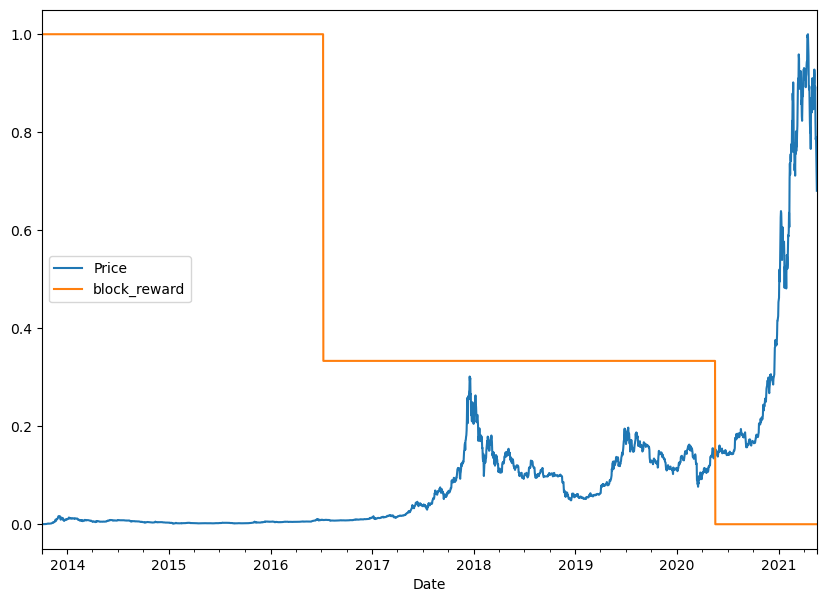

In [114]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));
     

### Making a windowed dataset using pandas

In [115]:
HORIZON = 1
WINDOW_SIZE = 7

In [117]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
    
bitcoin_prices_windowed.head(15)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [120]:
# create X and  y
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [121]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [122]:
# TRAIN AND TEST DATASETS using indexing

split_size = int(len(X)*0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### MODEL BUILDING

In [132]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])

model_6.fit(x=X_train,y=y_train,epochs=100,verbose=0,batch_size=128,validation_data=(X_test,y_test)
           ,callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


In [133]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 654.7772 - mae: 654.7772 - mse: 1347955.6250


[654.7771606445312, 654.7771606445312, 1347955.625]

In [134]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 565.9605 - mae: 565.9605 - mse: 1156876.1250


[565.9605102539062, 565.9605102539062, 1156876.125]

In [135]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=tf.squeeze(model_6.predict(X_test)))
model_6_results, model_5_2_results,model_4_results,model_2_results,model_1_results

18/18 [==============================] - 0s 837us/step


({'mae': 565.9604,
  'mse': 1156876.0,
  'rmse': 1075.5817,
  'mape': 2.5185902,
  'mase': 0.99423563},
 {'mae': 684.8933,
  'mse': 1584732.4,
  'rmse': 1258.8616,
  'mape': 3.048061,
  'mase': 1.2031678},
 {'mae': 564.63715,
  'mse': 1163080.4,
  'rmse': 1078.462,
  'mape': 2.522921,
  'mase': 0.99191105},
 {'mae': 581.0069,
  'mse': 1195664.0,
  'rmse': 1093.4642,
  'mape': 2.6513052,
  'mase': 1.0156058},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

In [162]:
tf.random.set_seed(42)

model_6_1 = tf.keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(75, activation="relu"),
    #layers.Dense(16, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_6_1_dense_multivariate")

model_6_1.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam())

model_6_1.fit(x=X_train,y=y_train,epochs=200,verbose=0,batch_size=256,validation_data=(X_test,y_test)
           ,callbacks=[create_model_checkpoint(model_name=model_6_1.name)])

INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_1_dense_multivariate\assets


In [163]:
model_6_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 942us/step - loss: 603.3321


603.3320922851562

In [164]:
model_6_1 = tf.keras.models.load_model("model_experiments/model_6_1_dense_multivariate")
model_6_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 566.0222


566.0221557617188

In [165]:
model_6_1_results = evaluate_preds(y_true=y_test,
                                 y_pred=tf.squeeze(model_6_1.predict(X_test)))
model_6_1_results, model_6_results,model_4_results,model_1_results

18/18 [==============================] - 0s 882us/step


({'mae': 566.0221,
  'mse': 1158437.8,
  'rmse': 1076.3075,
  'mape': 2.5672722,
  'mase': 0.99434406},
 {'mae': 565.9604,
  'mse': 1156876.0,
  'rmse': 1075.5817,
  'mape': 2.5185902,
  'mase': 0.99423563},
 {'mae': 564.63715,
  'mse': 1163080.4,
  'rmse': 1078.462,
  'mape': 2.522921,
  'mase': 0.99191105},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

In [166]:
tf.random.set_seed(42)

model_6_2 = tf.keras.Sequential([
    layers.Dense(156*2, activation="relu"),
    layers.Dense(156/2, activation="relu"),
    #layers.Dense(16, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_6_2_dense_multivariate")

model_6_2.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam())

model_6_2.fit(x=X_train,y=y_train,epochs=200,verbose=0,batch_size=156,validation_data=(X_test,y_test)
           ,callbacks=[create_model_checkpoint(model_name=model_6_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_2_dense_multivariate\assets


In [167]:
model_6_2.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 677.4954


677.4954223632812

In [168]:
model_6_2 = tf.keras.models.load_model("model_experiments/model_6_2_dense_multivariate")
model_6_2.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 564.1233


564.123291015625

In [169]:
model_6_2_results = evaluate_preds(y_true=y_test,
                                 y_pred=tf.squeeze(model_6_2.predict(X_test)))
model_6_2_results, model_6_1_results,model_6_results,model_4_results,model_1_results

18/18 [==============================] - 0s 1ms/step


({'mae': 564.1233,
  'mse': 1145266.1,
  'rmse': 1070.171,
  'mape': 2.5210087,
  'mase': 0.9910084},
 {'mae': 566.0221,
  'mse': 1158437.8,
  'rmse': 1076.3075,
  'mape': 2.5672722,
  'mase': 0.99434406},
 {'mae': 565.9604,
  'mse': 1156876.0,
  'rmse': 1075.5817,
  'mape': 2.5185902,
  'mase': 0.99423563},
 {'mae': 564.63715,
  'mse': 1163080.4,
  'rmse': 1078.462,
  'mape': 2.522921,
  'mase': 0.99191105},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

## Model 7
### N-BEATS

* window = 7 
* horizon = 1 

### Building an nbeats block layer

In [185]:
# creating custom nbeats layers
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size: int,
                theta_size: int,
                horizon: int,
                n_neurons: int,
                n_layers: int,
                **kwargs):
        
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        #output - theta activation - linear
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear",name="theta")
        
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        #output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [186]:
#testing above class
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [187]:
# create dummy inputs 

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [188]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)
#they will be random aaaaaaas the model isnt trained
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}") 

Backcast: [ 0.39322832  0.11928916  0.12684557 -0.13850063 -0.16799131  0.5940813
 -0.5406895 ]
Forecast: -0.38979285955429077


### Preparing data using tf.data

In [189]:
HORIZON = 1
WINDOW_SIZE = 7

In [190]:
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [193]:
bitcoin_prices_nbeats = bitcoin.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [197]:
X = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [199]:
# ^ performance

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [200]:
# values from N-BEATS
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS=30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [206]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1,tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [218]:
%%time

tf.random.set_seed(42)

# step 1
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                theta_size = THETA_SIZE,
                                horizon = HORIZON,
                                n_neurons = N_NEURONS,
                                n_layers = N_LAYERS,
                                name = "InitialBlock")

# step 2
stack_input = layers.Input(shape=(INPUT_SIZE),name = "stack_input")

# step 3 
residuals, forecast = nbeats_block_layer(stack_input)

# step 4
for i,_ in enumerate(range(N_STACKS-1)):
    
    #step 5
    backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
    )(residuals)
    
    # step 6
    residuals = layers.subtract([residuals, backcast], name = f"substract_{i}")
    forecast = layers.add([forecast, block_forecast], name = f"add_{i}")
    
# step 7
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# step 8
model_7.compile(loss="mae",
               optimizer = tf.keras.optimizers.Adam())

print("started...")

#step 9
model_7.fit(train_dataset, epochs= N_EPOCHS,
           validation_data = test_dataset, verbose=0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])

started...

Epoch 615: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 715: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: total: 2h 35min 14s
Wall time: 34min 12s


In [219]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 377ms/step - loss: 580.8903


580.8902587890625

In [220]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=make_preds(model_7, test_dataset))
model_7_results

1/1 [==============================] - 8s 8s/step


{'mae': 580.89026,
 'mse': 1217809.2,
 'rmse': 1103.544,
 'mape': 2.6260316,
 'mase': 1.0204633}

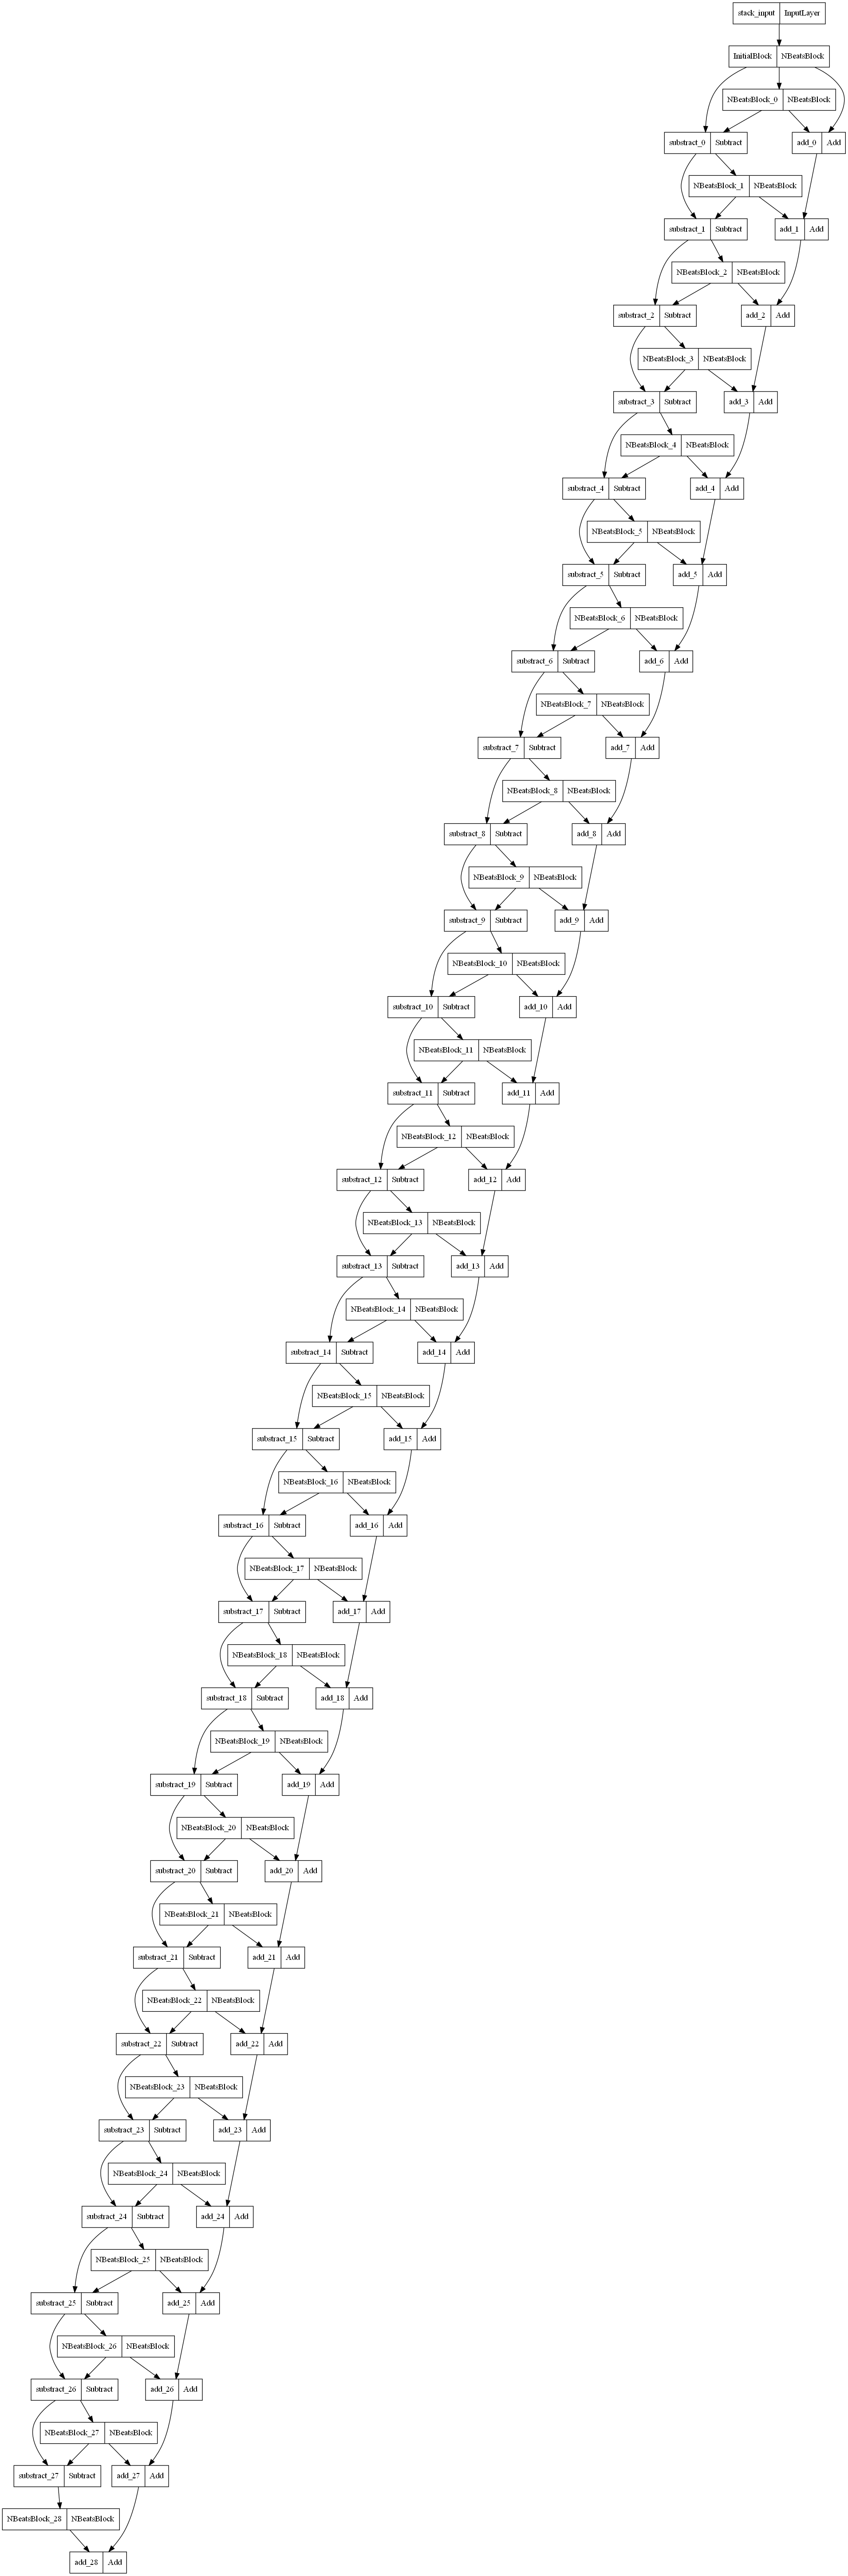

In [221]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [222]:
naive_results, model_1_results

({'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.5165248,
  'mase': 0.99957},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

## Model 8
### ENSAMBLE
MULTIPLE MODELS STACKED TOGETHER
* window = 7 
* horizon = 1 

In [241]:
# def get_ensemble_models(horizon=HORIZON,
#                         train_data=train_dataset,
#                         test_data=test_dataset,
#                         num_iter=10,
#                         num_epochs=1000,
#                         loss_fns=["mae", "mse", "mape"]):
#     """
#     Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
#     For example, if num_iter=10, a list of 30 trained models will be returned: 
#     10 * len(["mae", "mse", "mape"]).
#     """
#     # Make empty list for trained ensemble models
#     ensemble_models = []

#     # Create num_iter number of models per loss function
#     for i in range(num_iter):
#         # Build and fit a new model with a different loss function
#         for loss_function in loss_fns:
#             print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

#         # Construct a simple model (similar to model_1)
#         model = tf.keras.Sequential([
#         # Initialize dense layers with normal distribution for estimating prediction intervals later on
#         layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
#         layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
#         layers.Dense(HORIZON)
#       ])

#       # Compile simple model with current loss function
#         model.compile(loss=loss_function,
#                     optimizer=tf.keras.optimizers.Adam(),
#                     metrics=["mae", "mse"])
      
#       # Fit the current model
#         model.fit(train_data,
#                 epochs=num_epochs,
#                 verbose=0,
#                 validation_data=test_data,
#                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
#                                                             patience=200,
#                                                             restore_best_weights=True),
#                            tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
#                                                                 patience=100,
#                                                                 verbose=1)])
#       # Append fitted model to list of ensemble models
#         ensemble_models.append(model)

#     return ensemble_models

In [242]:
# %%time
# # Get list of trained ensemble models
# ensemble_models = get_ensemble_models(num_iter=5,
#                                       num_epochs=1000)

In [244]:
#ensemble_models

In [232]:
# # Create a function which uses a list of trained models to make and return a list of predictions
# def make_ensemble_preds(ensemble_models, data):
#     ensemble_preds = []
#     for model in ensemble_models:
#         preds = model.predict(data)
#         ensemble_preds.append(preds)
#     return tf.constant(tf.squeeze(ensemble_preds))

In [243]:
# %%time
# ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
#                                      data=test_dataset)
# ensemble_preds

In [235]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
    ensemble_models = []
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
            model = tf.keras.Sequential([
            layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
            layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
            layers.Dense(HORIZON)                                 
          ])
            model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
            model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
            ensemble_models.append(model)

    return ensemble_models
     

In [237]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 346: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 446: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 117: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 566: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 668: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 768: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 868: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 264: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 364: ReduceLROnPla

In [238]:
ensemble_models

In [239]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [240]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 76ms/step
CPU times: total: 781 ms
Wall time: 1.1 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8847.98  ,  8802.517 ,  9112.359 , ..., 49894.2   , 48603.133 ,
        45622.76  ],
       [ 8799.54  ,  8751.075 ,  9005.393 , ..., 50010.816 , 48574.223 ,
        45939.76  ],
       [ 8830.796 ,  8839.294 ,  9084.3955, ..., 50036.883 , 48792.605 ,
        45860.004 ],
       ...,
       [ 8755.936 ,  8756.135 ,  8996.766 , ..., 50055.953 , 48188.086 ,
        46565.17  ],
       [ 8799.027 ,  8769.133 ,  9043.057 , ..., 49581.957 , 47931.293 ,
        45591.207 ],
       [ 8781.858 ,  8750.314 ,  9051.46  , ..., 50737.8   , 49016.652 ,
        46757.805 ]], dtype=float32)>

In [245]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8799.876, 8773.758, 9043.057, 8725.48 , 8757.654, 8732.359,
       8641.387, 8489.573, 8455.65 , 8516.032], dtype=float32)

In [246]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8800.955, 8777.112, 9044.881, 8723.915, 8754.731, 8736.461,
       8644.33 , 8494.447, 8461.353, 8516.735], dtype=float32)>

In [247]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 568.2313,
 'mse': 1145831.4,
 'rmse': 1070.4352,
 'mape': 2.581365,
 'mase': 0.99822503}

In [248]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 567.9664,
 'mse': 1143334.1,
 'rmse': 1069.2681,
 'mape': 2.5833867,
 'mase': 0.9977596}

In [249]:
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds,axis=0)
    interval = 1.96*std
    pred_mean = tf.reduce_mean(preds,axis=0)
    lower, upper = pred_mean - interval, pred_mean+interval
    return lower, upper

In [251]:
lower, upper= get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8717.47  ,  8731.729 ,  8979.919 ,  8661.149 ,  8712.987 ,
         8627.583 ,  8580.026 ,  8433.11  ,  8382.102 ,  8481.762 ,
         8159.7373,  8074.5874,  7994.99  ,  7573.3696,  7225.0664,
         7198.7563,  6992.92  ,  7116.411 ,  7054.862 ,  7433.0503,
         7317.55  ,  7671.1494,  7505.795 ,  7299.59  ,  7250.3086,
         7226.8906,  7170.3755,  7351.2305,  7463.716 ,  7508.6406,
         7499.228 ,  7256.9316,  7175.6636,  7136.434 ,  7136.253 ,
         7213.1675,  7039.6636,  7066.87  ,  6820.389 ,  6541.7754,
         7255.432 ,  7054.5615,  7055.698 ,  7145.515 ,  7122.887 ,
         7050.221 ,  7173.2114,  7170.553 ,  7146.3716,  7189.7007,
         7272.6304,  7365.317 ,  7208.3516,  7126.289 ,  7117.9263,
         6903.605 ,  7221.567 ,  7278.6143,  7310.738 ,  7657.618 ,
         7987.9478,  8089.127 ,  7785.4326,  7997.383 ,  8046.1123,
         8108.7114,  8045.667 ,  8659.021 ,  8825.185 ,  8707.701 ,

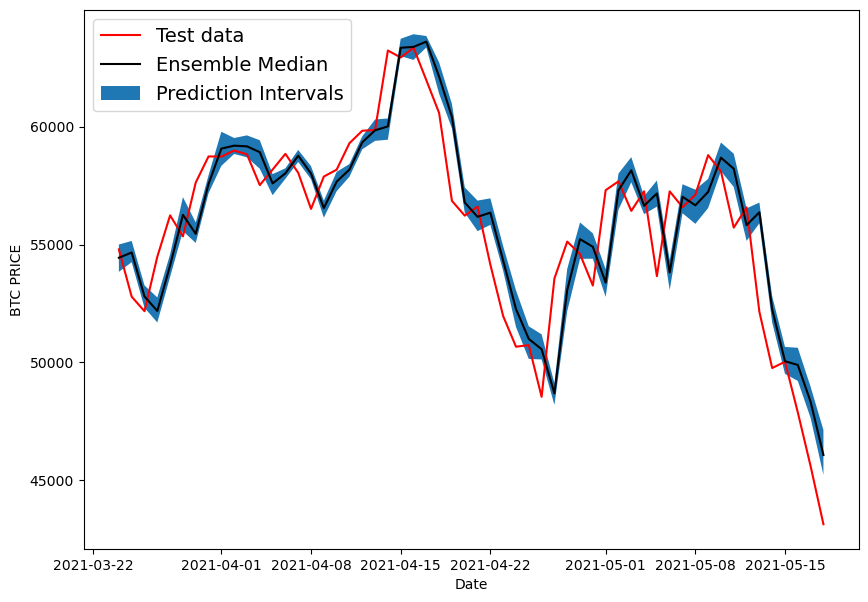

In [255]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"r",label = "Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC PRICE")

plt.fill_between(X_test.index[offset:],
                (lower)[offset:],
                (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model 9
### FUTURE PREDICITION 
predicting true future instead of pseudo future 

In [291]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
#X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels

len(X_all), len(y_all)

(2780, 2780)

In [293]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all
     

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [296]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### MAKE PREDICITONS INTO THE FUTURE

In [287]:
INTO_FUTURE = 14

In [325]:
def make_future_forecasts(values, model, into_future, window_size = WINDOW_SIZE):
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]
    
    for _ in range (into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Prediciting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
        future_forecast.append(tf.squeeze(future_pred).numpy())
        #print("i")
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
        #print("j")
        
    return future_forecast

In [354]:
future_forecast = make_future_forecasts(values=y_all, model=model_9,into_future=INTO_FUTURE,window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 44ms/step
Prediciting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55329.84375

1/1 [==============================] - 0s 18ms/step
Prediciting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55329.84375   ] -> Prediction: 50193.55859375

1/1 [==============================] - 0s 18ms/step
Prediciting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55329.84375    50193.55859375] -> Prediction: 50039.34375

1/1 [==============================] - 0s 17ms/step
Prediciting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55329.84375    50193.55859375 50039.34375   ] -> Prediction: 47563.0625

1/1 [==============================] - 0s 16ms/step
Prediciting on: 
 [47885.62525472 45604.61575361 43144.47129086 55329.84375
 50193.55859375 50039.34375    47563.0625    ]

In [355]:
future_forecast

[55329.844,
 50193.56,
 50039.344,
 47563.062,
 46918.332,
 46155.24,
 48221.047,
 53207.812,
 49245.766,
 48779.918,
 46563.27,
 47234.23,
 47648.305,
 50184.12]

### PLOTTING THE FUTURE

In [356]:
def get_future_dates(start_date, into_future, offset = 1):
    start_date = start_date +np.timedelta64(offset, "D")
    end_data = start_date + np.timedelta64(into_future, "D")
    
    return np.arange(start_date, end_data, dtype = "datetime64[D]")

In [357]:
last_timestep = bitcoin.index[-1]

In [358]:
last_timestep

Timestamp('2021-05-18 00:00:00')

In [359]:
next_time_steps = get_future_dates(start_date=last_timestep,into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [362]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin.Price[-1])
len(next_time_steps), len(future_forecast)   

(15, 15)

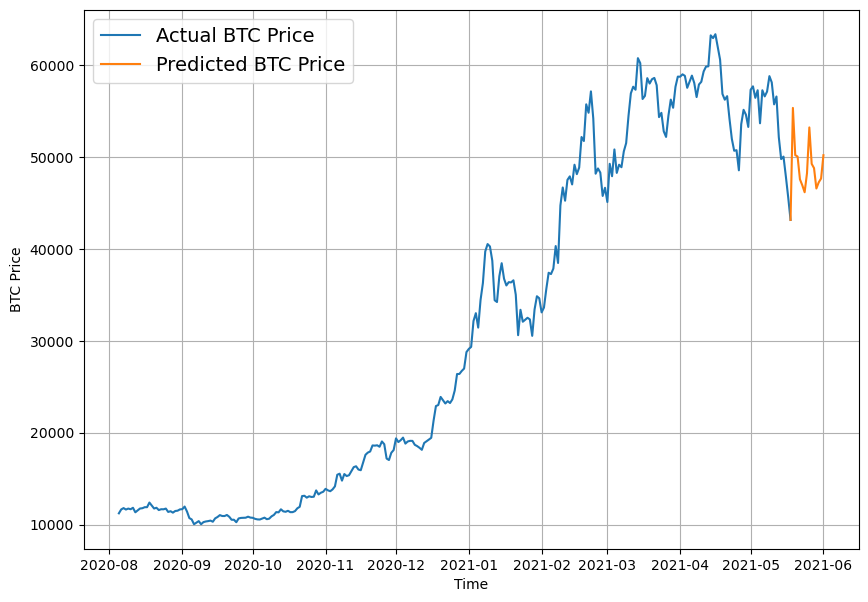

In [363]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin.index, bitcoin.Price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## MODEL 10
### TURKEY PROBLEM



* HORIZON = 1
* WINDOW_SIZE = 7
     


In [373]:
# TURKEY DATA
btc_price_turkey = list(bitcoin.Price.copy())
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [376]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [380]:
btc_timesteps_turkey = np.array(bitcoin.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

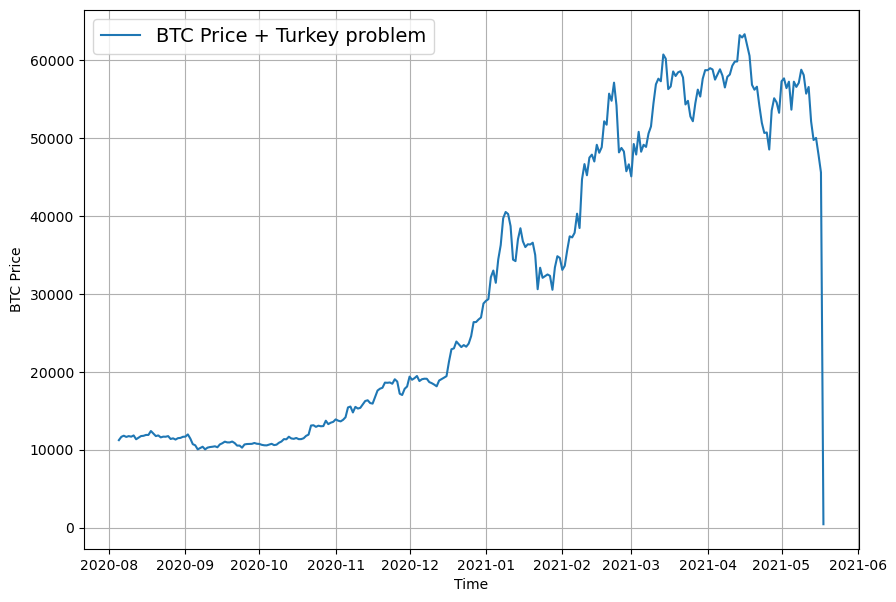

In [381]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [382]:
HORIZON = 1
WINDOW_SIZE = 7

In [383]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [385]:
turkey_model = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_10_turkey_model")

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


In [386]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 667.0856


667.0855712890625

In [387]:
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 979us/step - loss: 649.2520


649.251953125

In [388]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 831us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8902.162, 8798.623, 8998.478, 8825.243, 8778.569, 8739.301,
       8677.05 , 8589.762, 8456.746, 8530.367], dtype=float32)>

In [391]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results,model_1_results

({'mae': 17144.193,
  'mse': 615507000.0,
  'rmse': 23743.107,
  'mape': 121.56462,
  'mase': 26.5307},
 {'mae': 565.6077,
  'mse': 1157613.4,
  'rmse': 1075.9244,
  'mape': 2.5281384,
  'mase': 0.9936161})

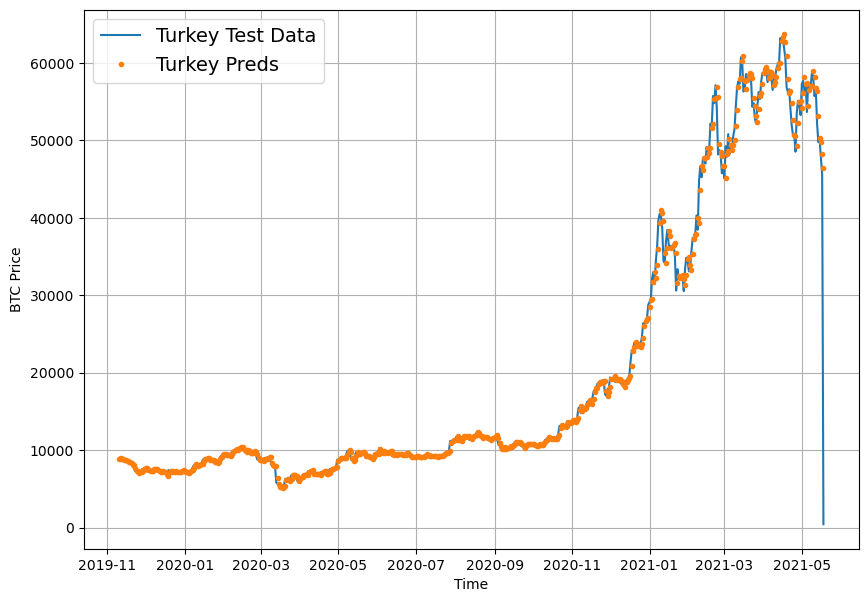

In [393]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);


# COMPARE MODELS